In [1]:
import os
import json
import glob
import numpy as np
import pandas as pd

os.chdir("/home/tmoins/Documents/computational philology/SuperStyl")

from superstyl.load import load_corpus
from superstyl.svm import train_svm, plot_rolling
from superstyl.preproc.pipe import docs_to_samples, get_samples
from superstyl.load_from_config import load_corpus_from_config

# V1

.......loading texts.......
.......getting features.......
.......getting counts.......
.......feeding data frame.......


100%|██████████| 79/79 [00:00<00:00, 6046.64it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.0s finished


              precision    recall  f1-score   support

       ChrTr       0.88      0.81      0.84        26
       GerbM       1.00      0.91      0.95        23
       JnRen       0.82      0.93      0.88        30

    accuracy                           0.89        79
   macro avg       0.90      0.88      0.89        79
weighted avg       0.89      0.89      0.89        79

.......... Training final SVM with all train set ........


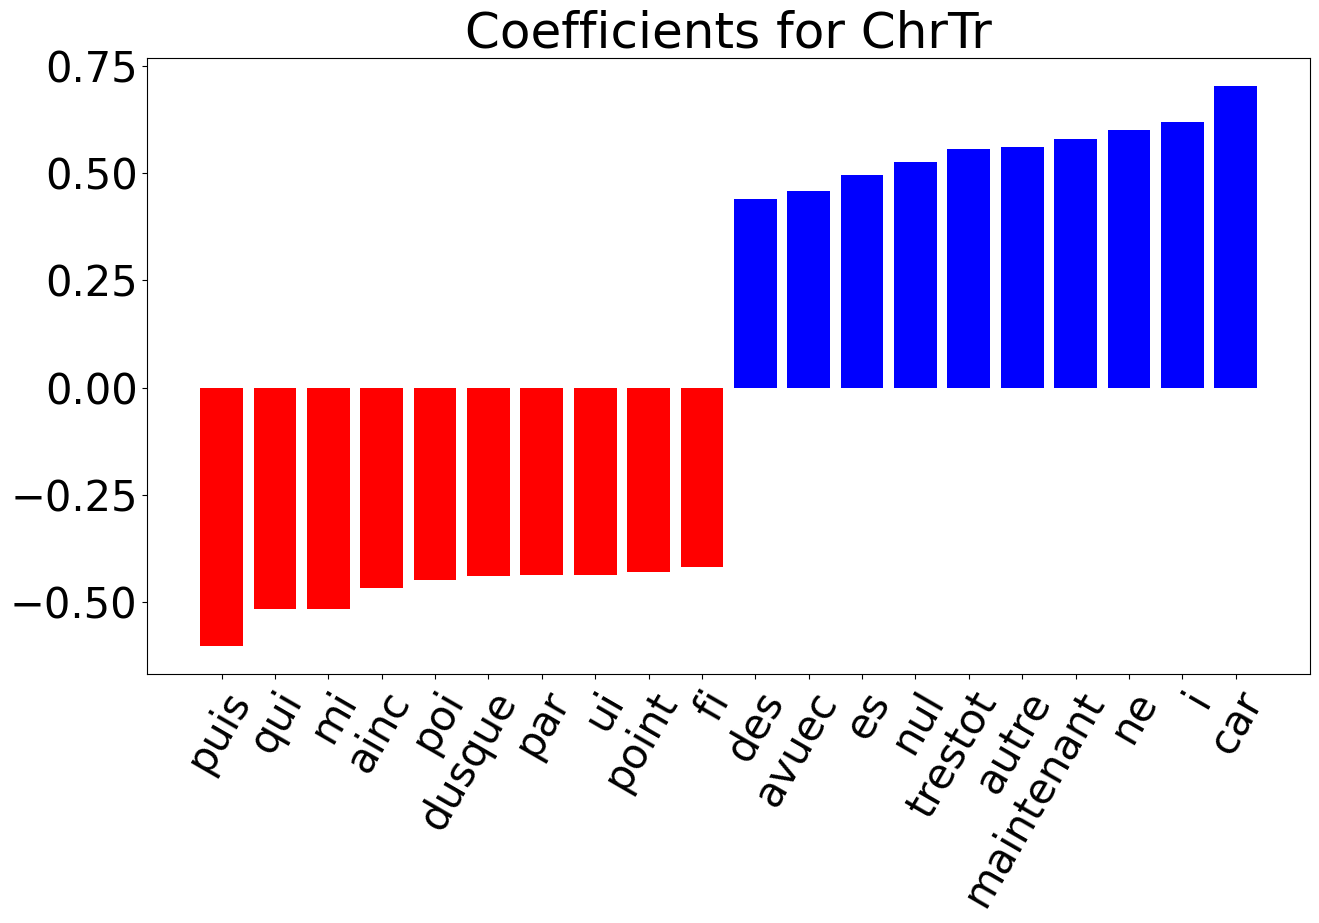

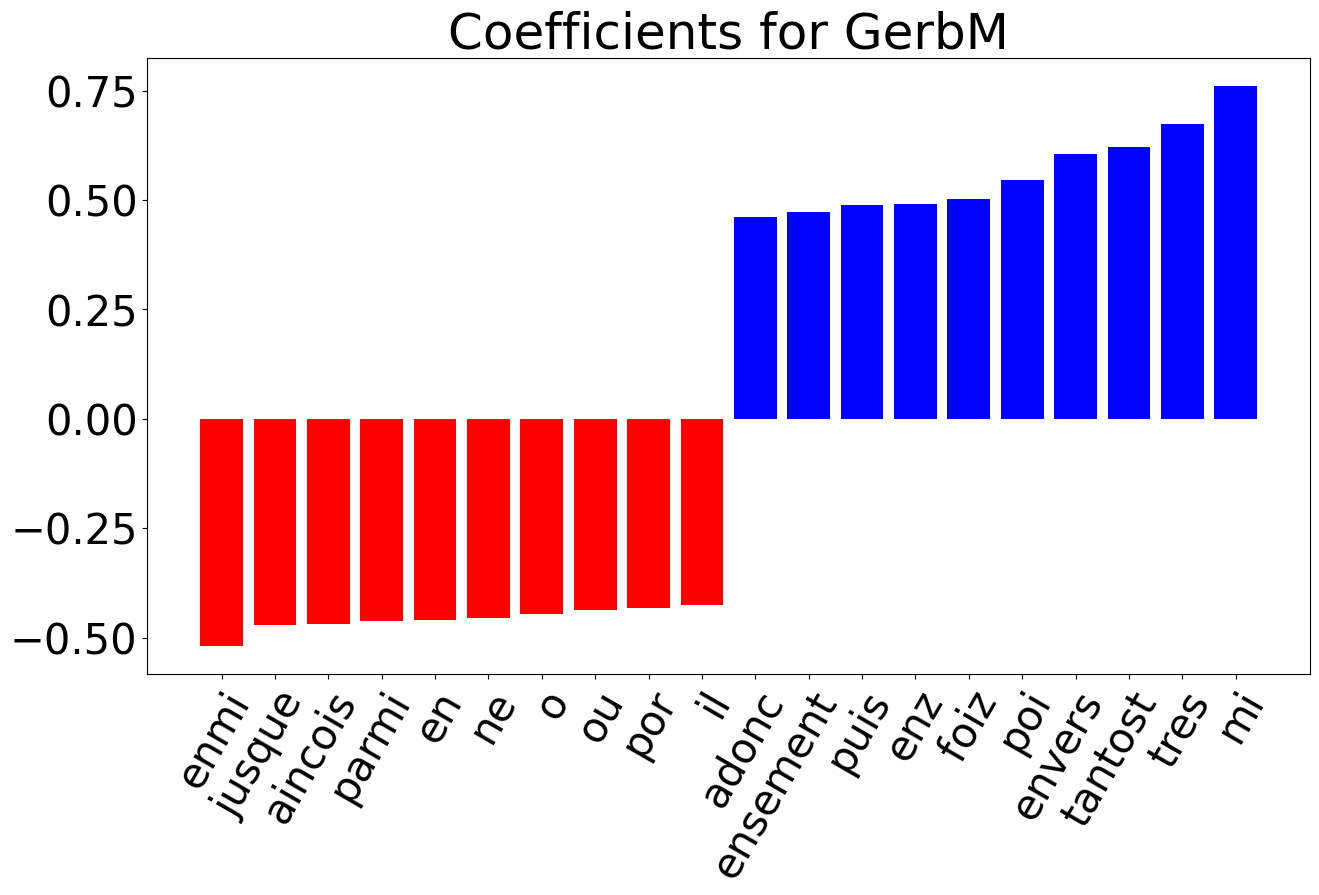

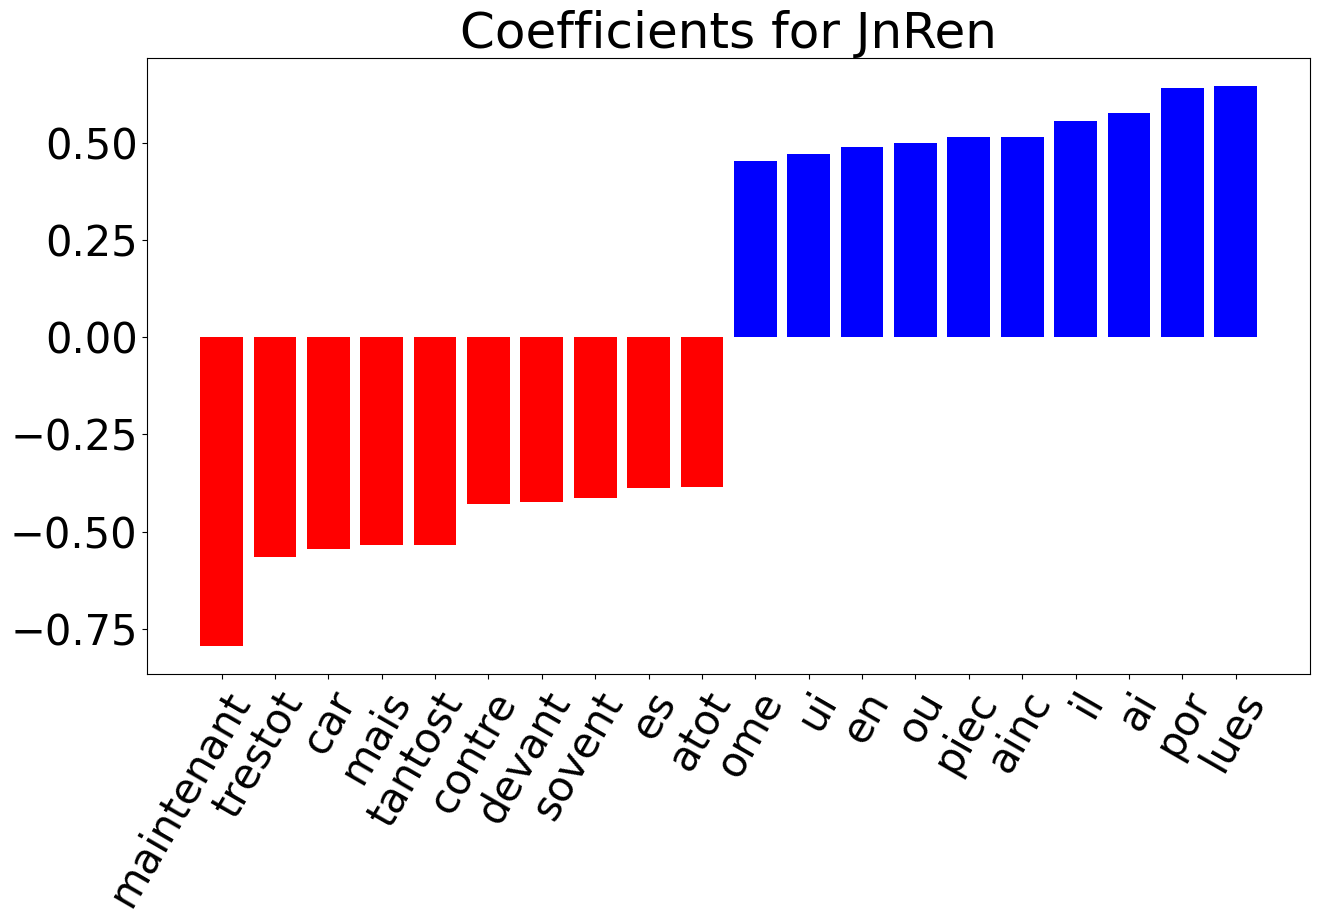

In [2]:
# python load_corpus.py 
#                       -s data/chrestien/data/LEMMA/train/* 
#                       -t words -n 1 
#                       -f function_words_old-french_of3c.json 
#                       -x txt --sampling --sample_units words --sample_size 3000

f = "../data/function_words_old-french_of3c.json"
with open(f, 'r') as f:
    my_feats = json.loads(f.read())

data_paths = glob.glob("../data/v1/LEMMA/train/*")

chrestien_fw, feat_list = load_corpus(data_paths=data_paths,
                                      feats="words", n=1, feat_list=my_feats,
                                      format="txt", units="words", sampling=True, size = 3000)

# mv feats_tests_n1_k_5000.csv chrestien_fw.csv
# python train_svm.py 
#                       chrestien_fw.csv 
#                       --cross_validate group-k-fold 
#                       --balance downsampling 
#                       --class_weights --get_coefs

results = train_svm(train=chrestien_fw,
                    test=None,
                    cross_validate="group-k-fold",
                    balance="downsampling",
                    class_weights=True,
                    get_coefs=True)

.......loading texts.......
.......getting features.......
.......getting counts.......
.......feeding data frame.......


100%|██████████| 55/55 [00:00<00:00, 4858.61it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]


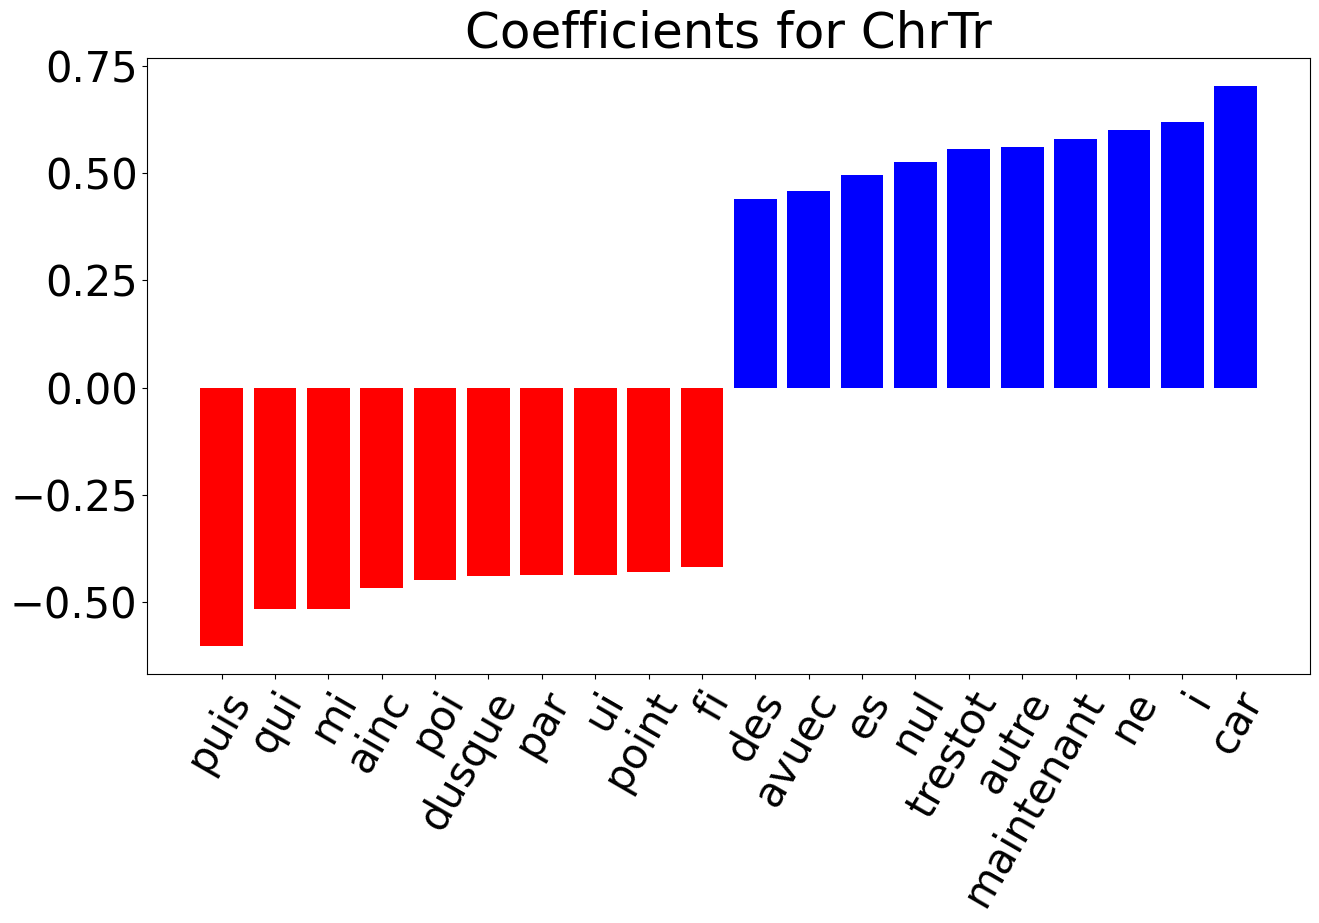

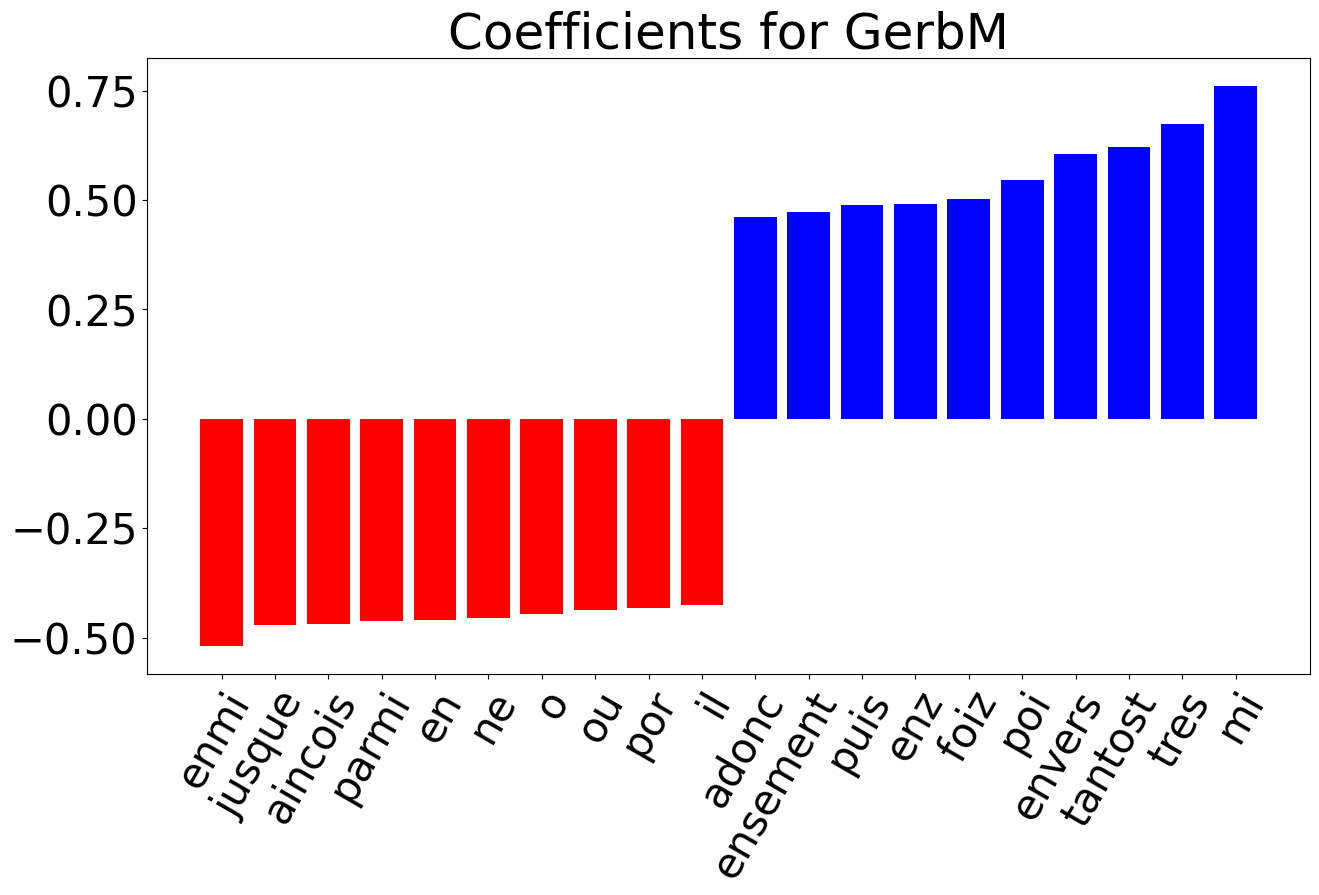

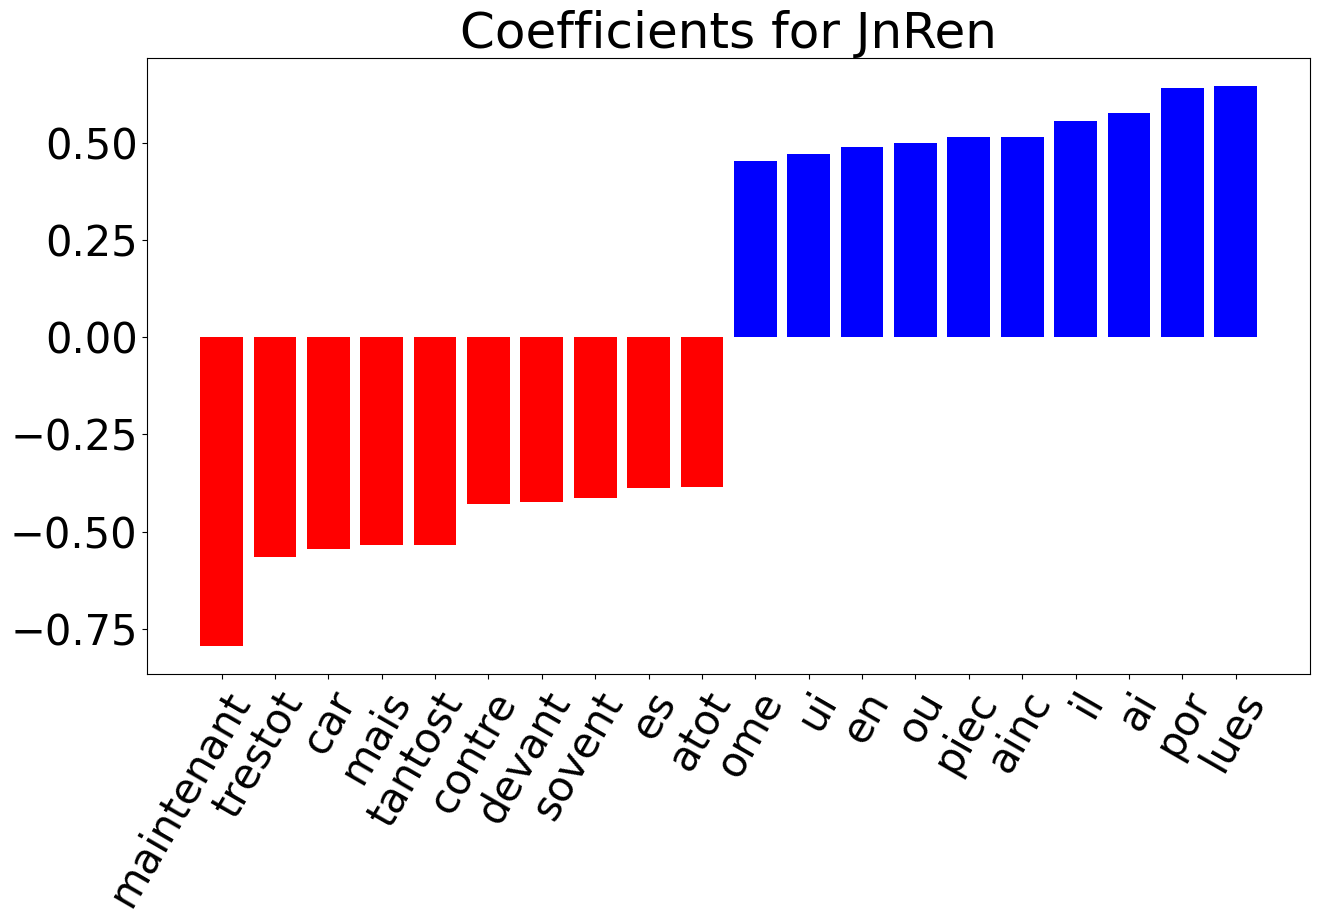

In [ ]:
# python main.py 
#               -s data/chrestien/data/LEMMA/unseen/* 
#               -t words -n 1
#               -f function_words_old-french_of3c.json 
#               -x txt --sampling 
#               --sample_units words --sample_size 3000

data_paths = glob.glob("../data/v1/LEMMA/unseen/*")

chrestien_fw_test, feat_list = load_corpus(data_paths=data_paths,
                                           feats="words", n=1, feat_list=my_feats,
                                           format="txt", units="words", sampling=True, size = 3000)

# mv feats_tests_n1_k_5000.csv chrestien_fw_test.csv
# python train_svm.py chrestien_fw.csv --balance downsampling --class_weights --get_coefs --test_path chrestien_fw_test.csv --final

results = train_svm(train=chrestien_fw,
                    test=chrestien_fw_test,
                    balance="downsampling",
                    class_weights=True,
                    get_coefs=True,
                    final_pred=True)

### Rolling Analysis

.......loading texts.......
.......getting features.......
.......getting counts.......
.......feeding data frame.......


100%|██████████| 1557/1557 [00:00<00:00, 4105.49it/s]


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]


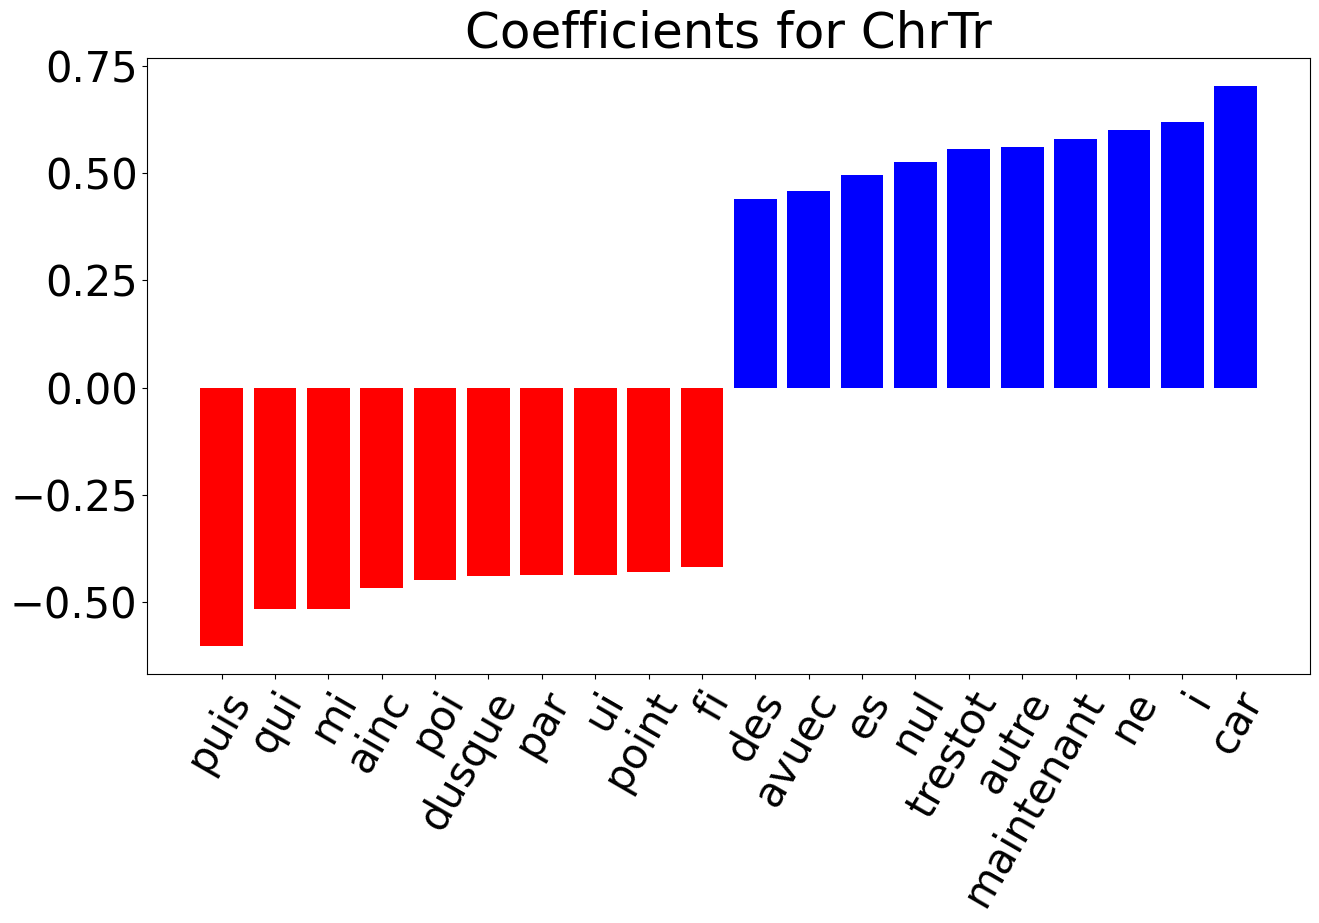

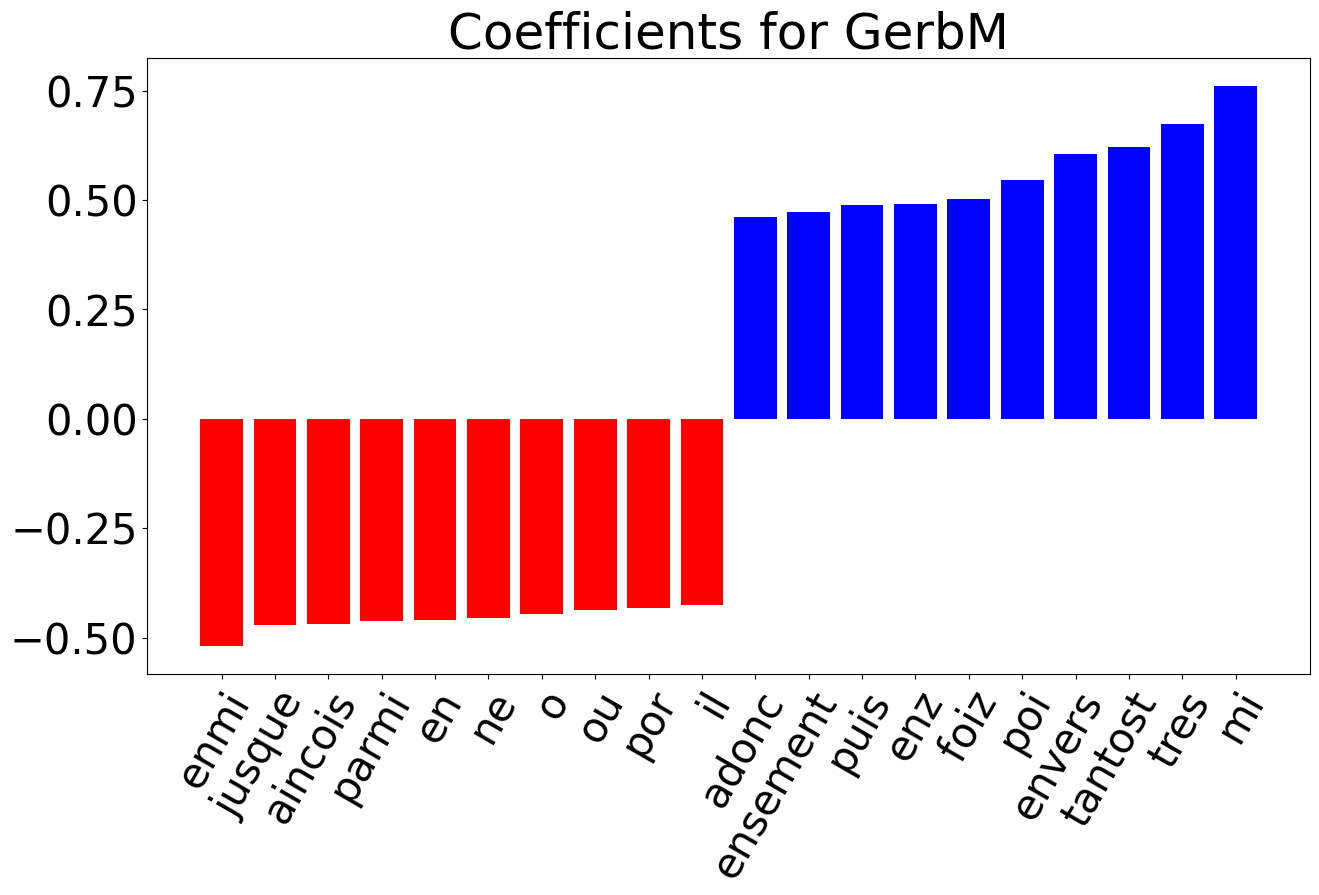

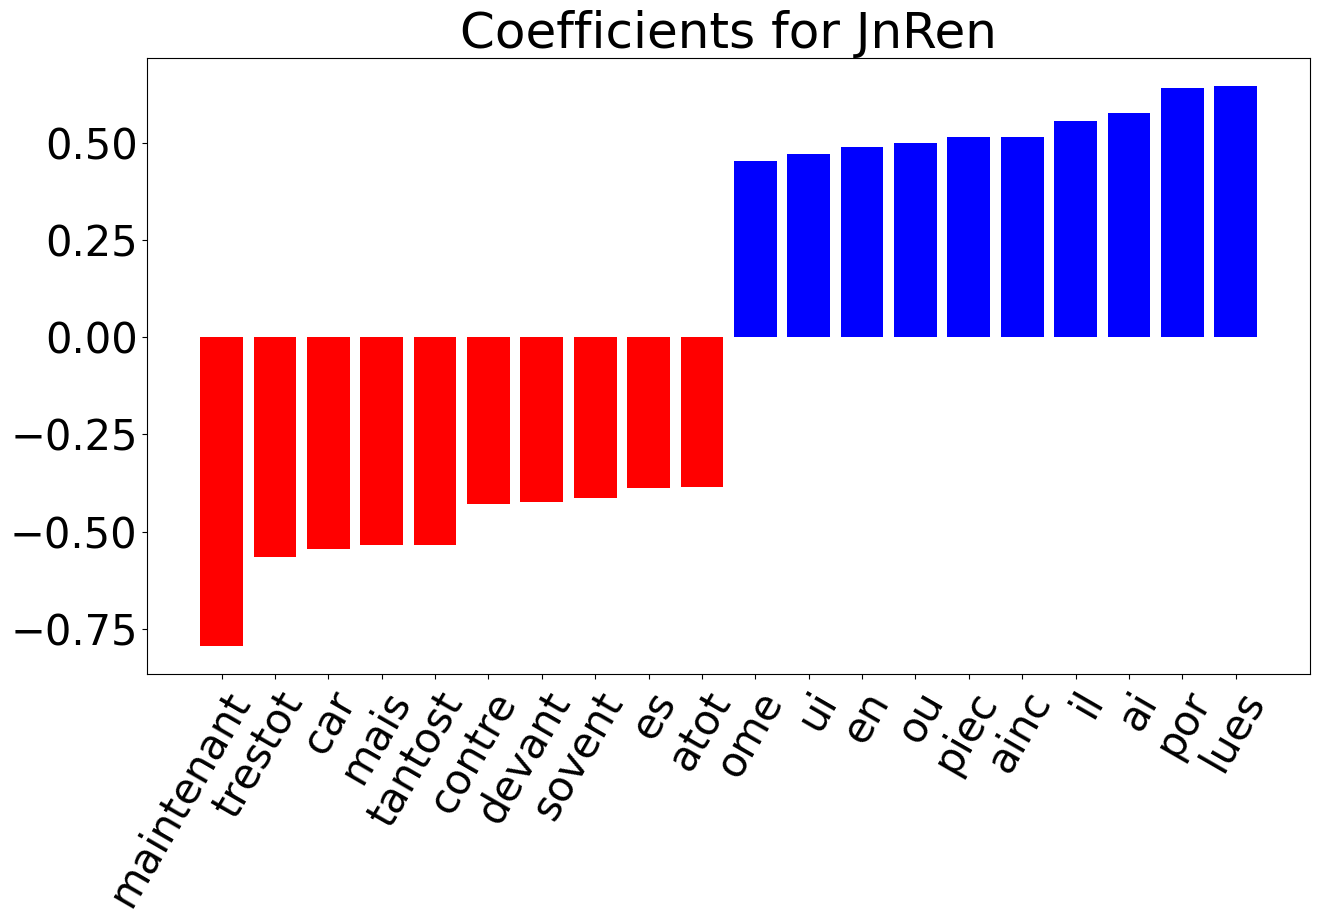

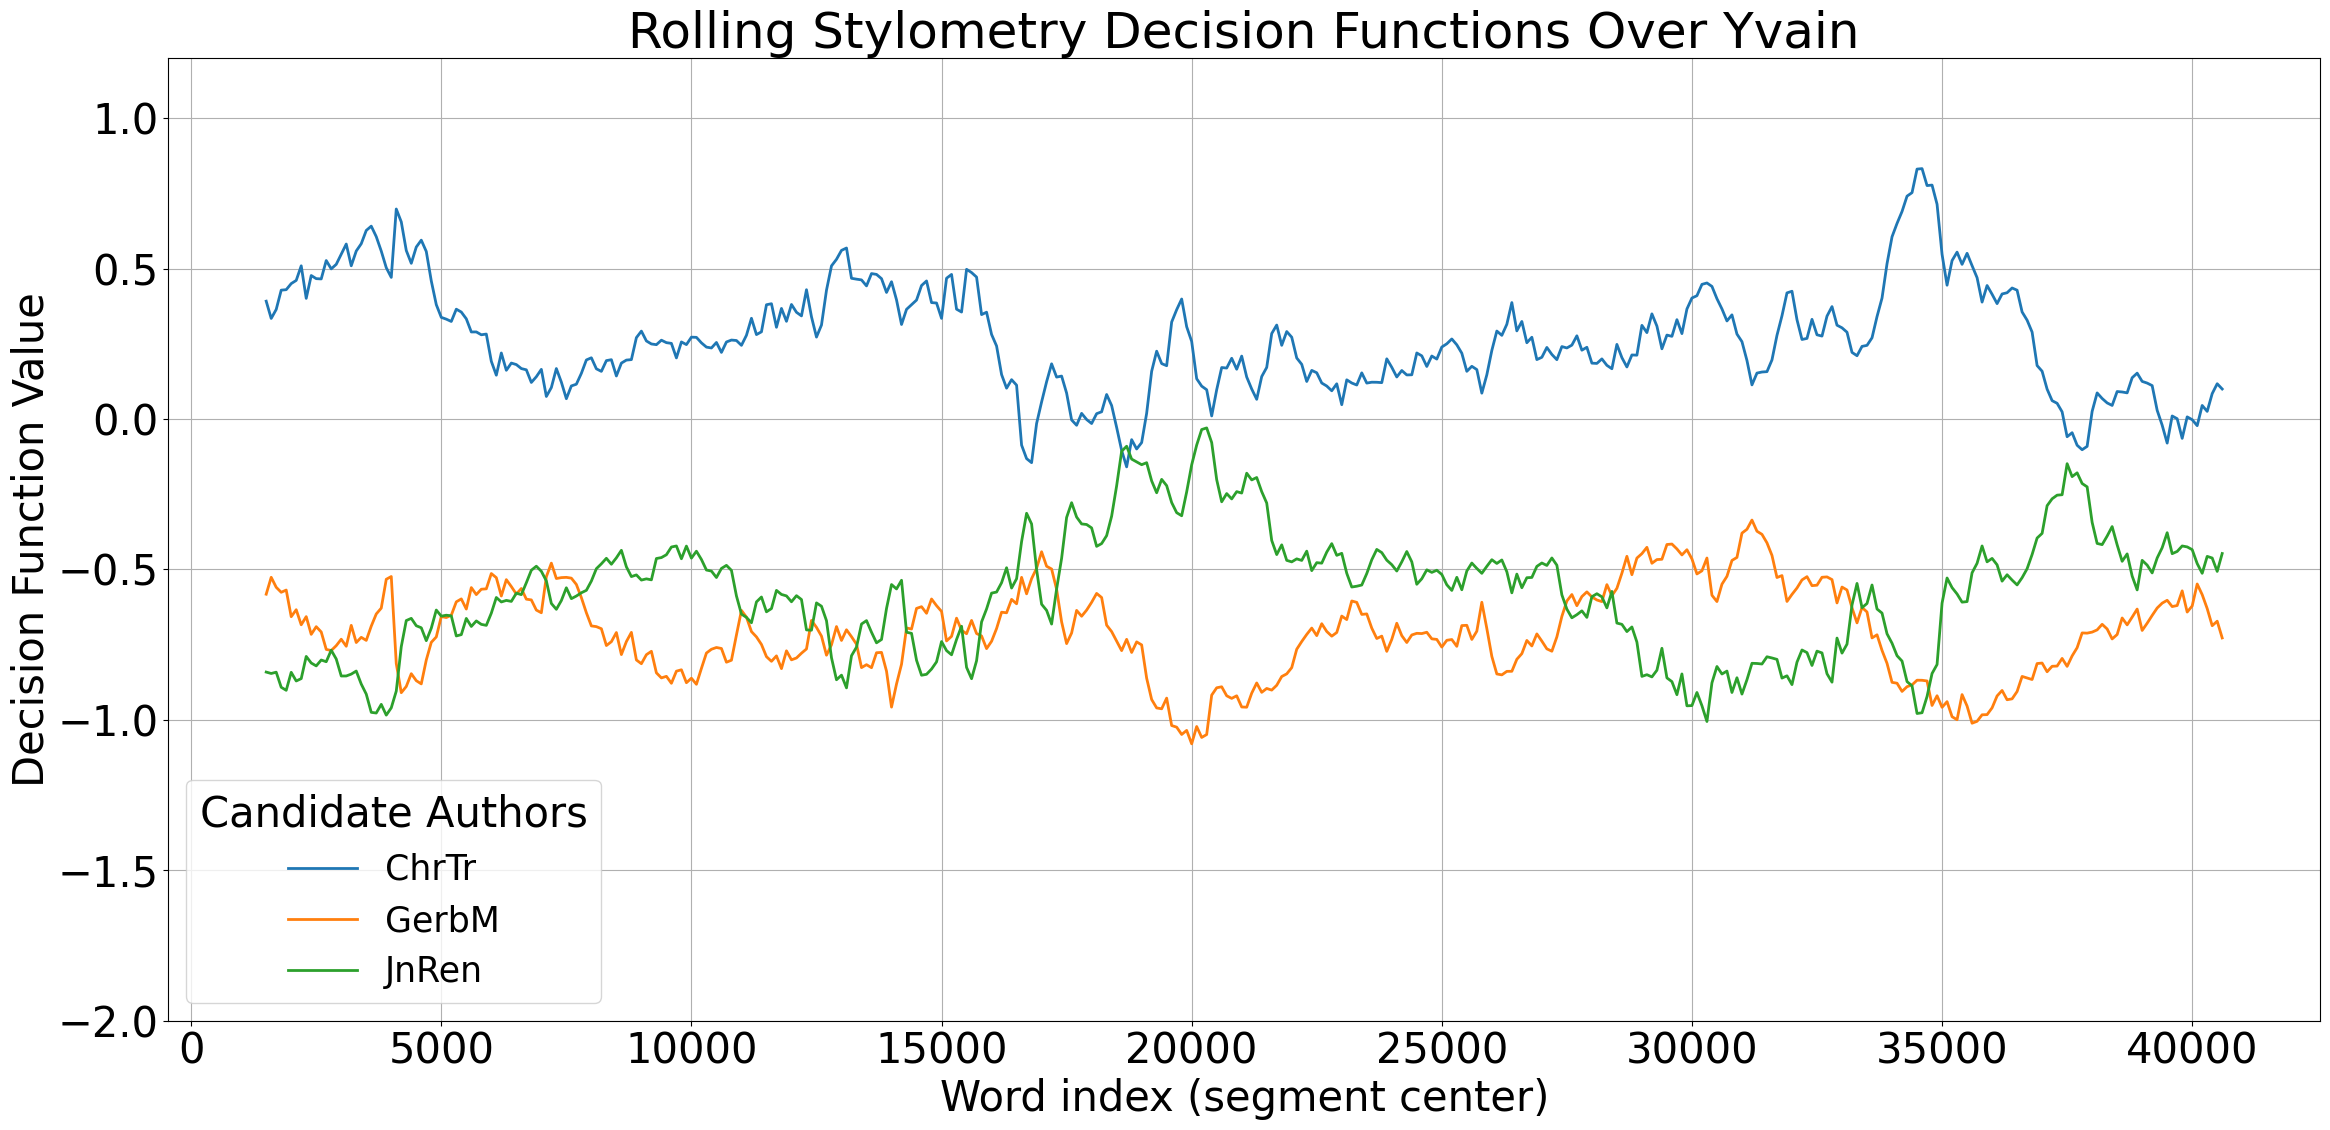

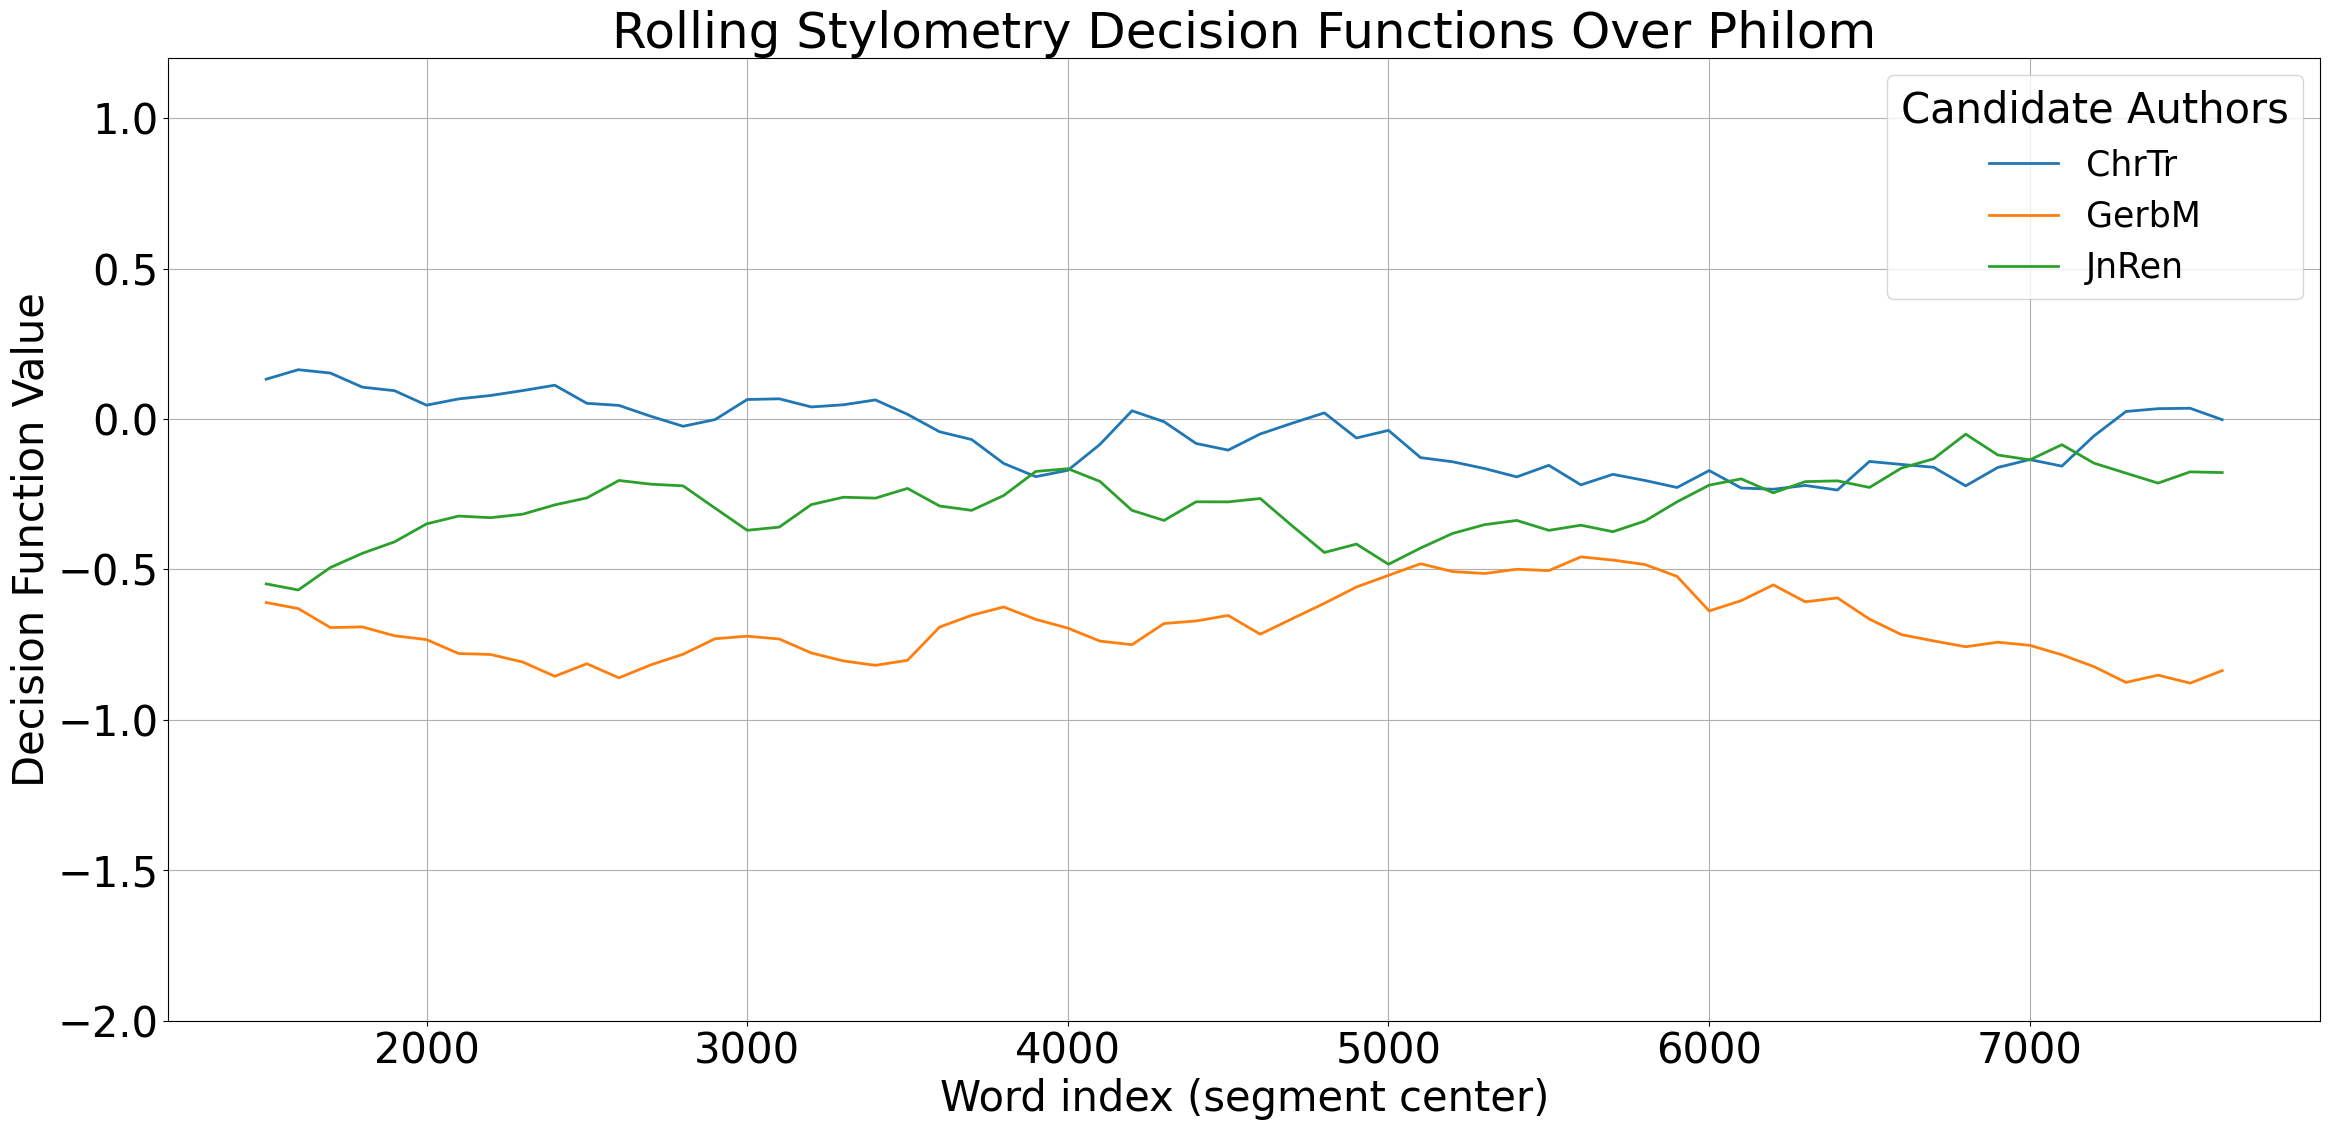

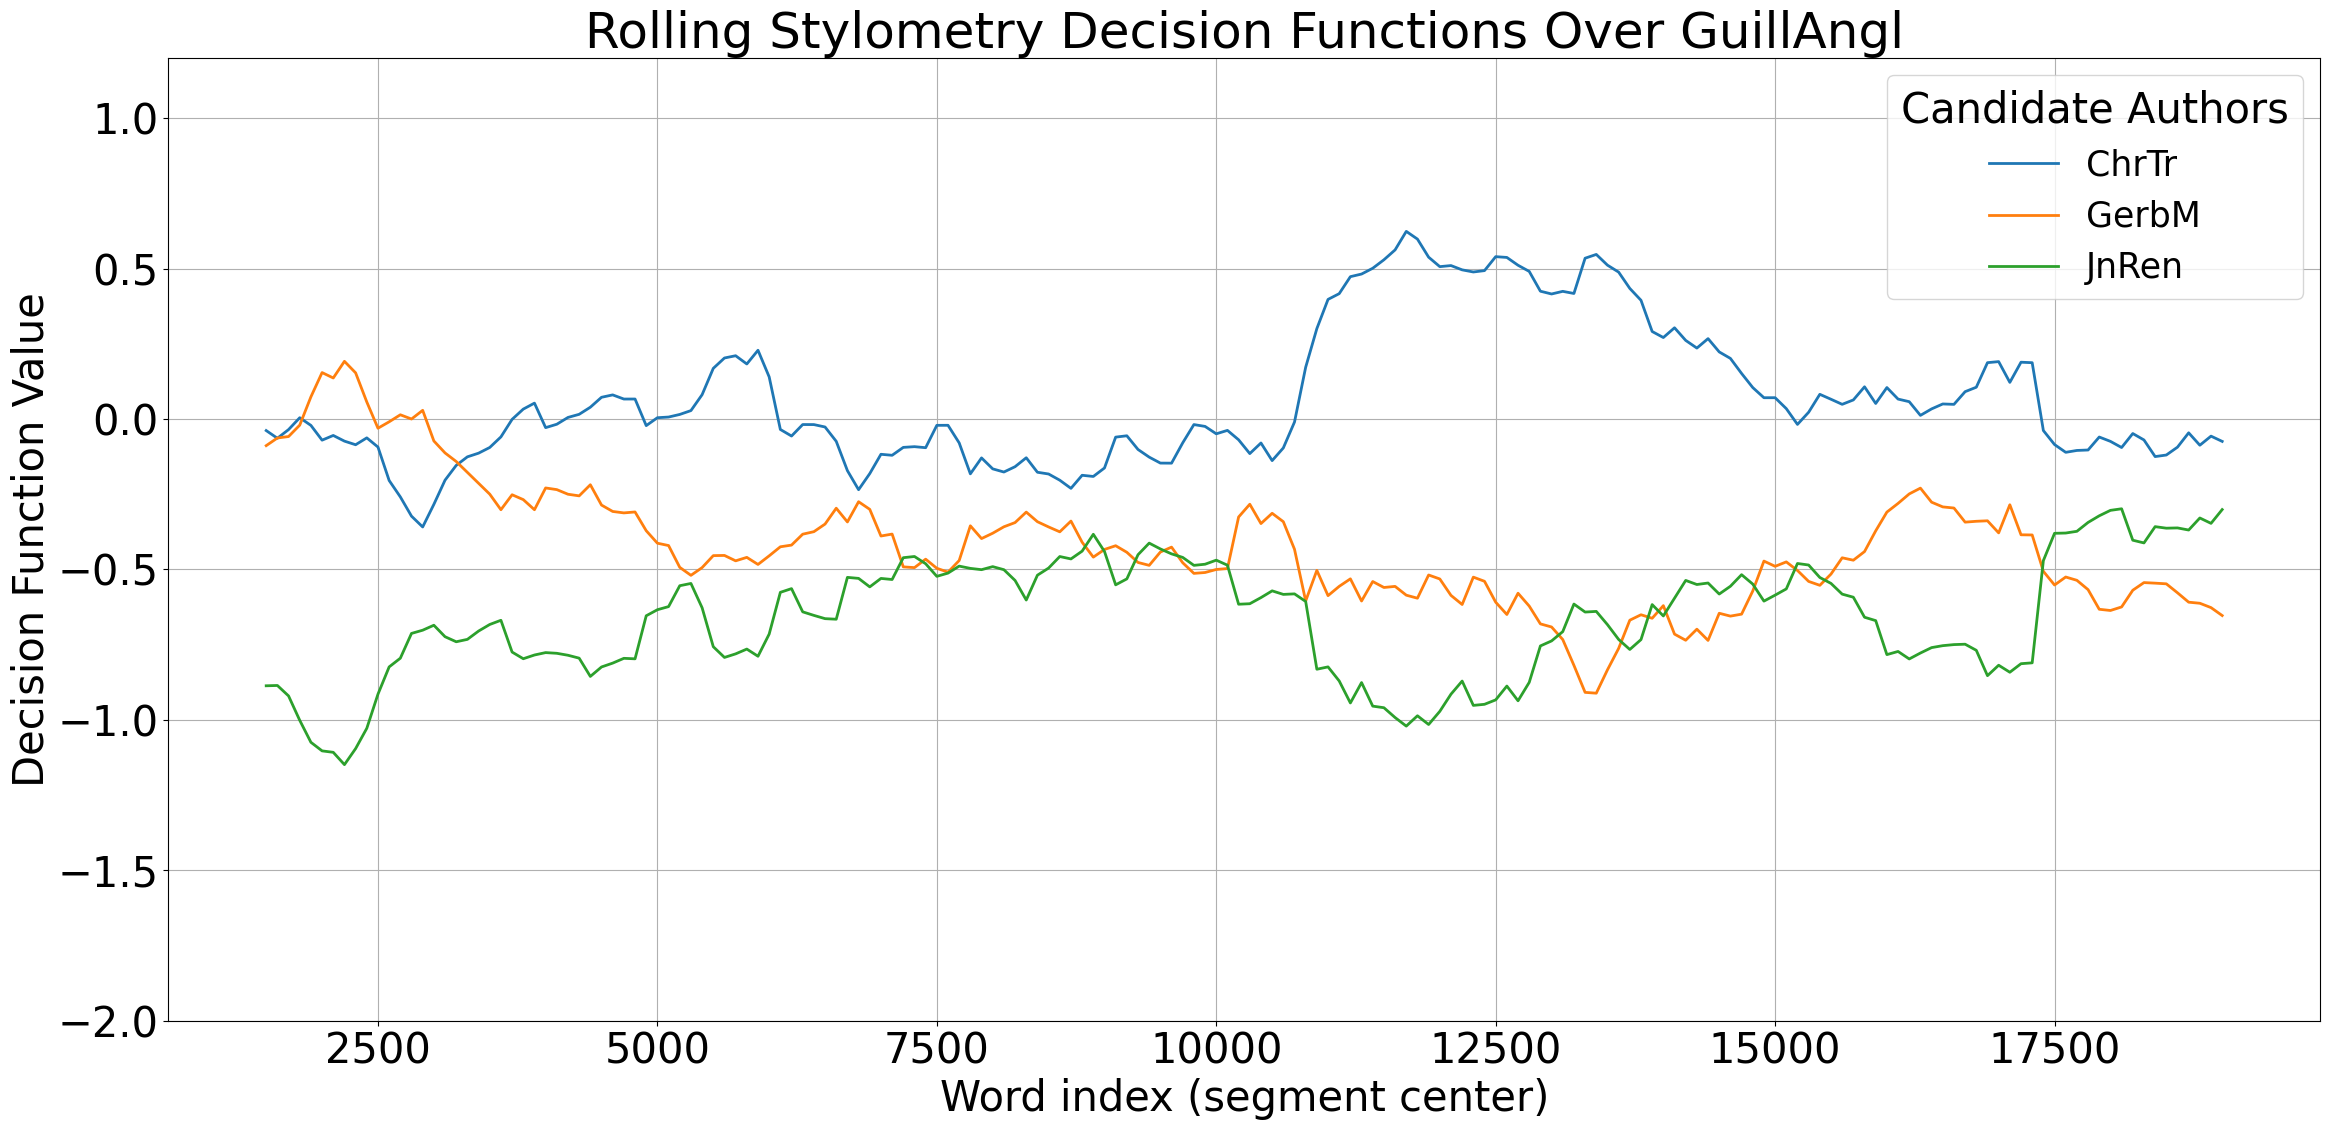

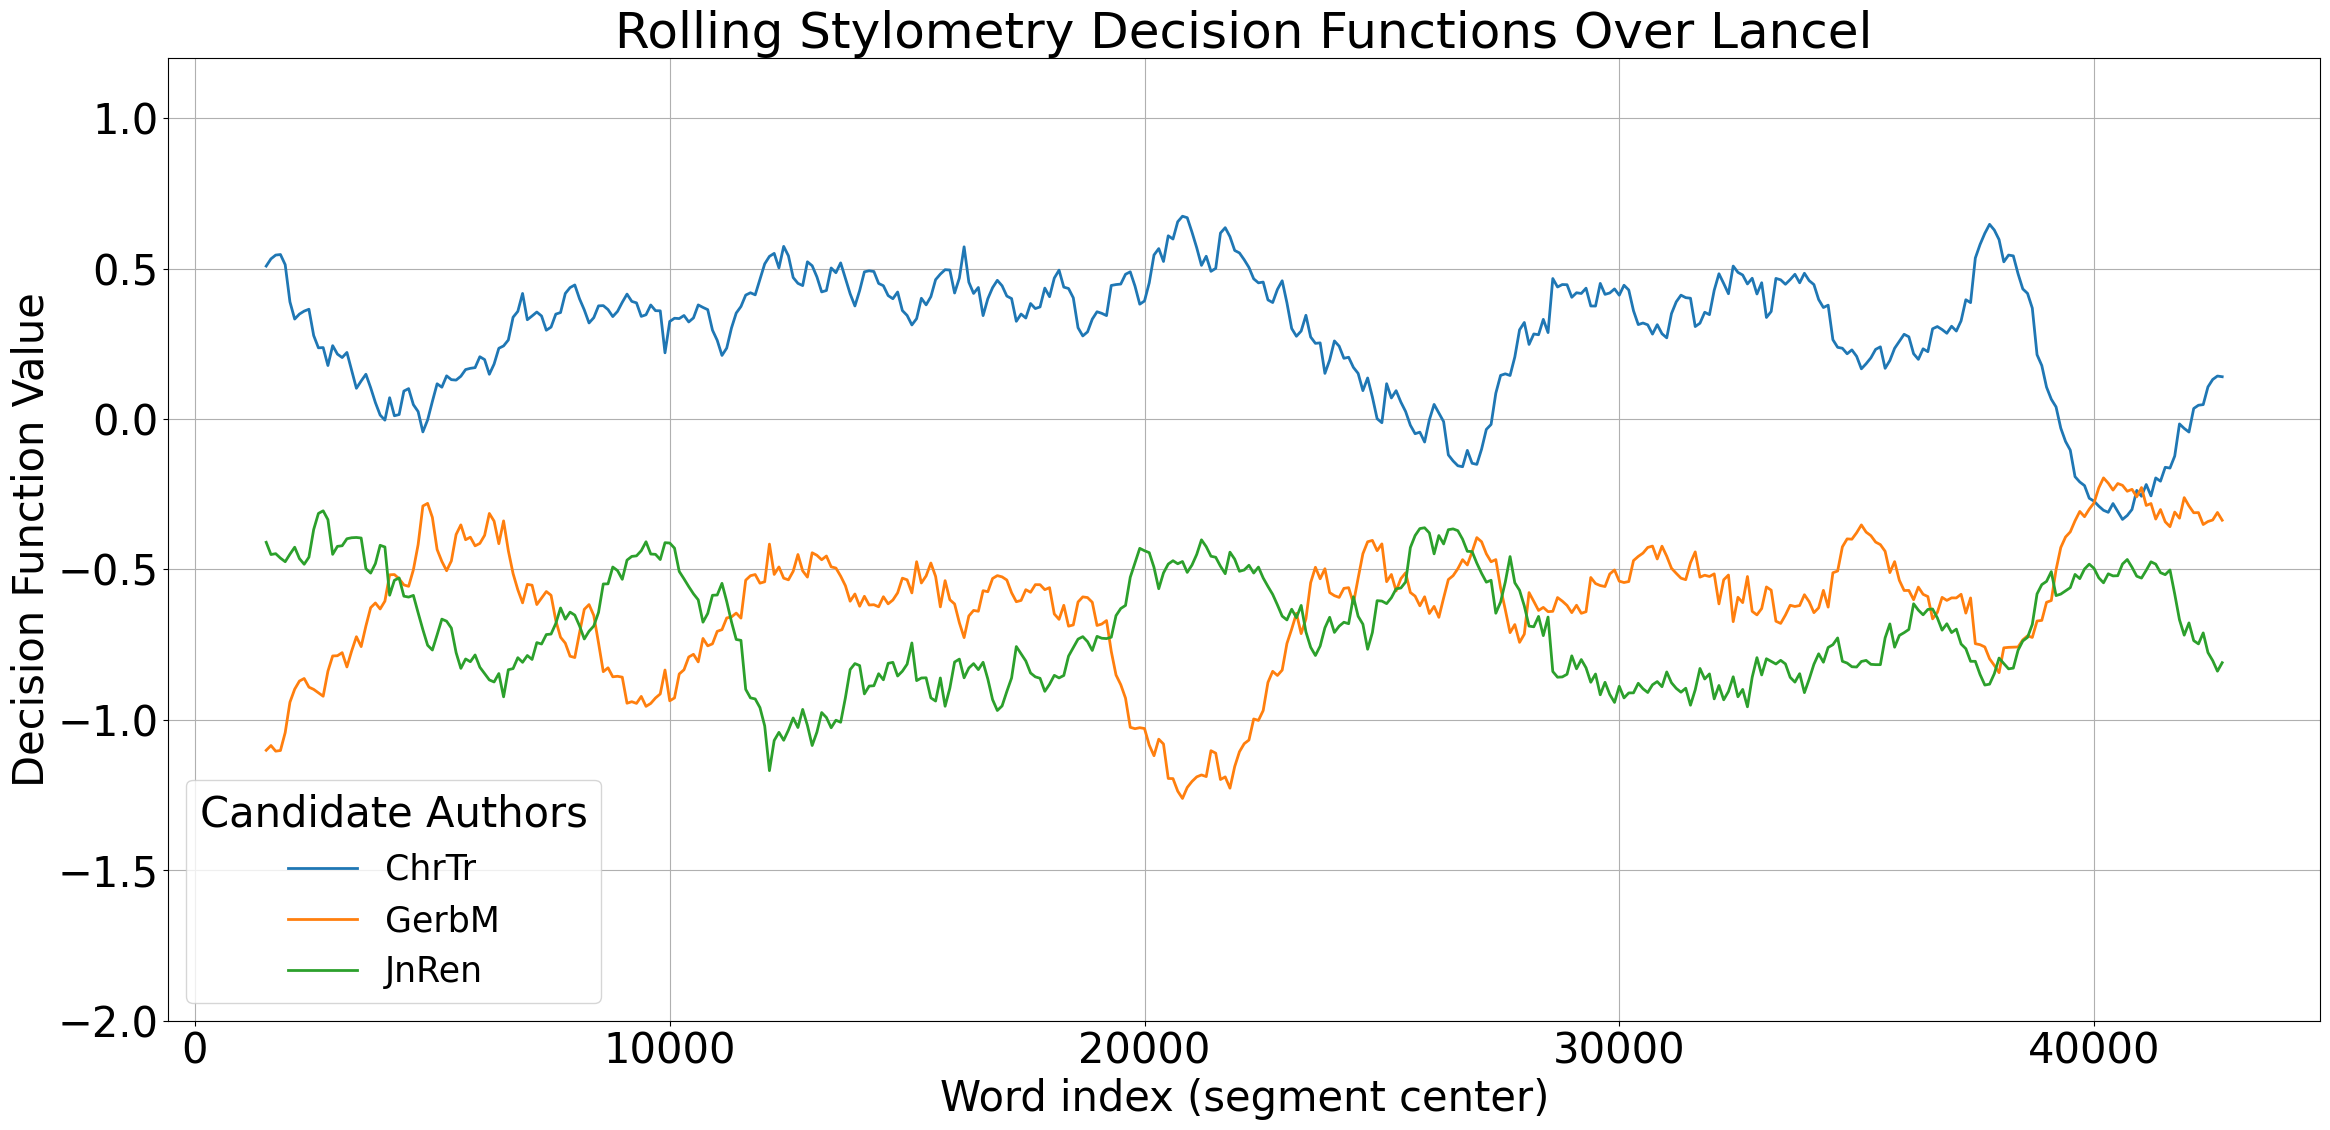

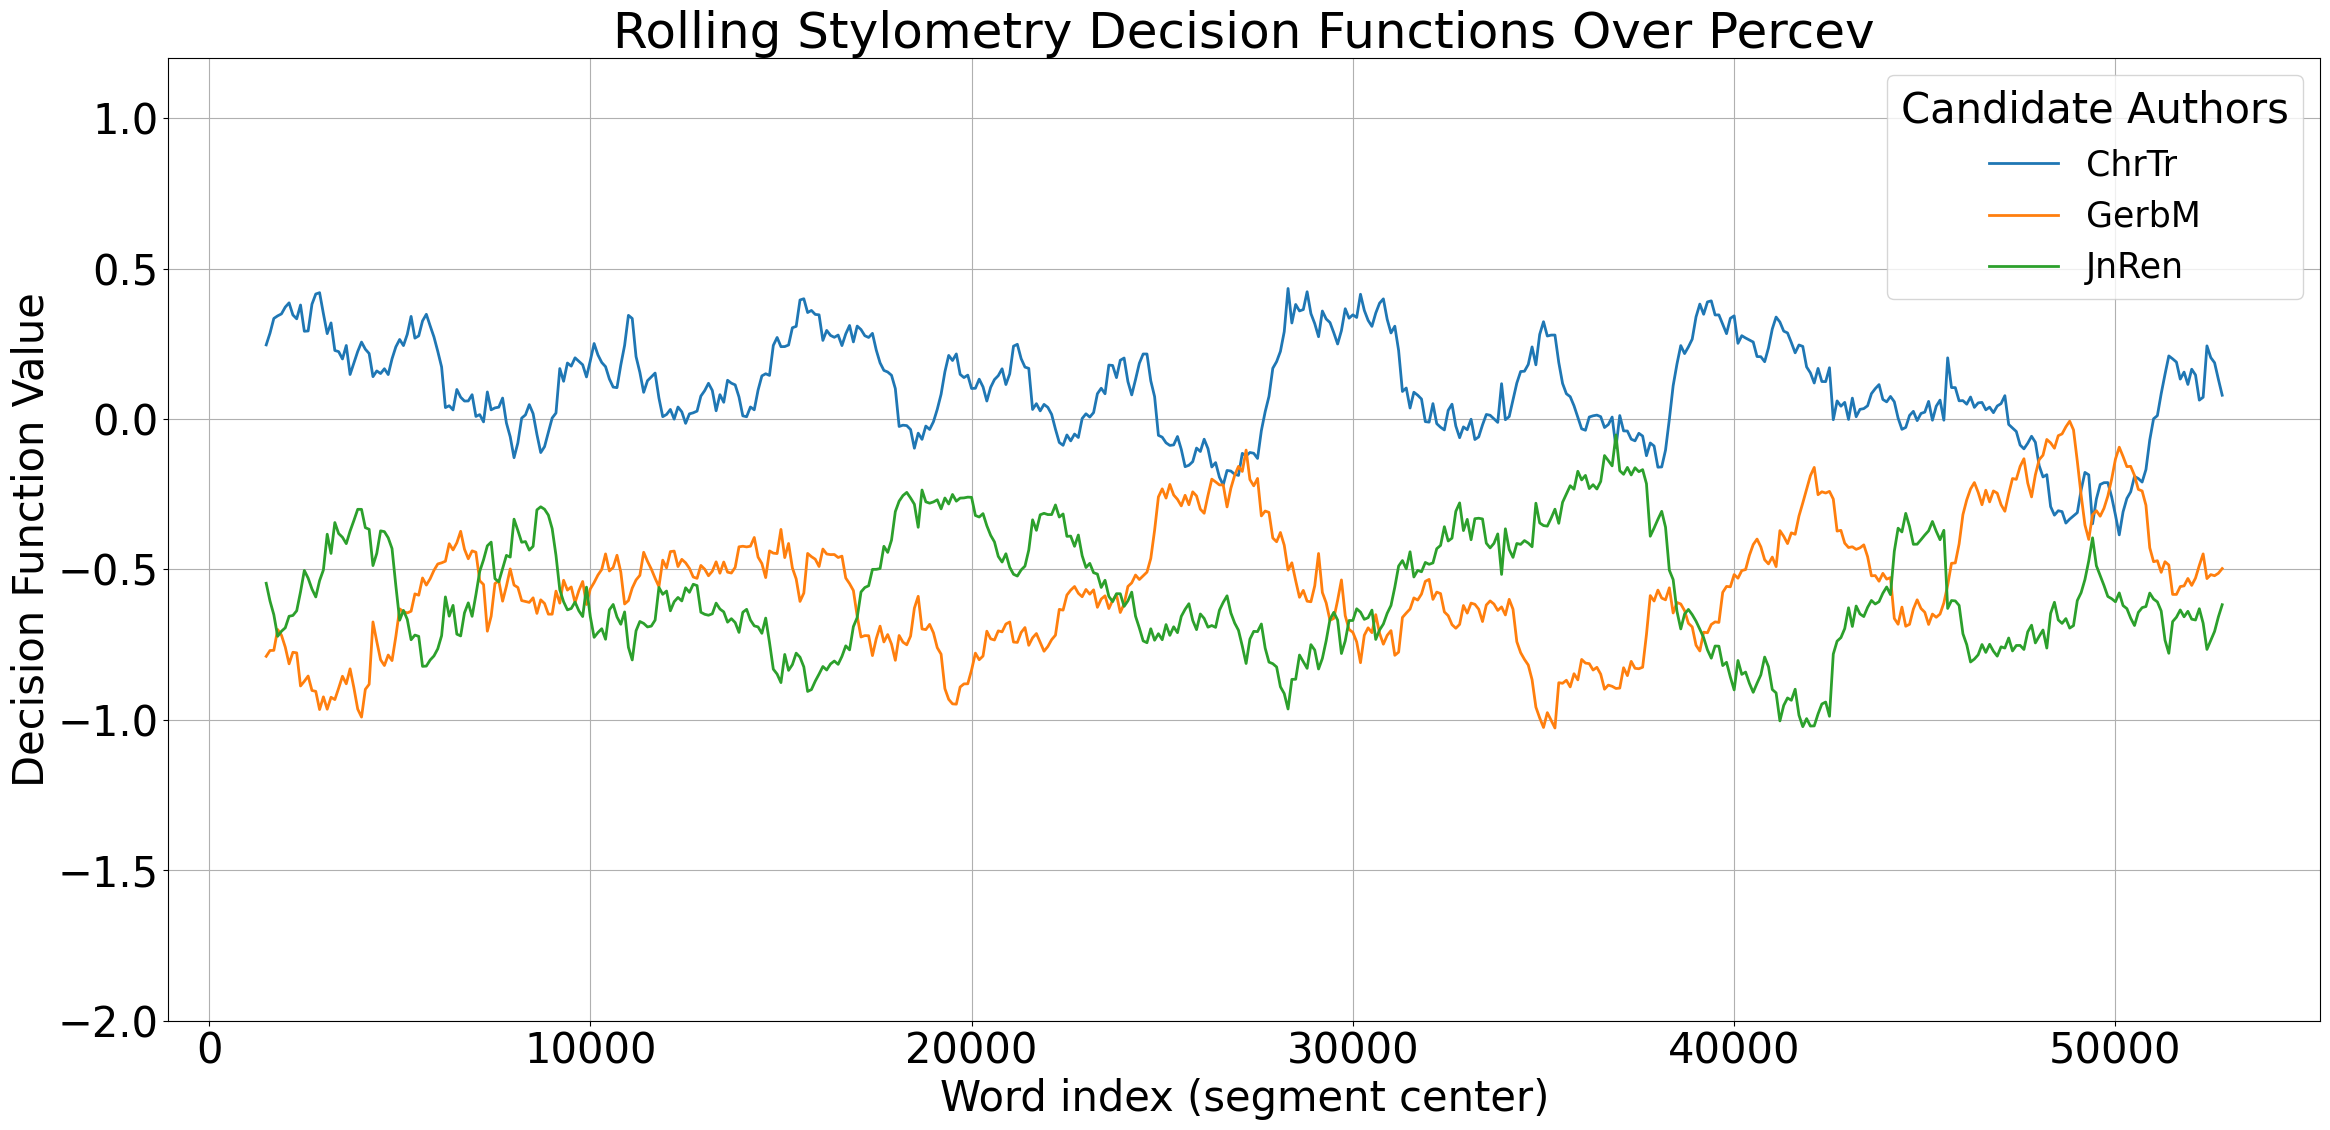

In [ ]:
# python main.py 
#               -s data/chrestien/data/LEMMA/unseen/* 
#               -t words -n 1 
#               -f function_words_old-french_of3c.json 
#               -x txt --sampling --sample_units words 
#               --sample_size 3000 --sample_step 100

data_paths = glob.glob("../data/v1/LEMMA/unseen/*")

chrestien_fw_test_rolling, feat_list = load_corpus(data_paths=data_paths,
                                                   feats="words", n=1, feat_list=my_feats,
                                                   format="txt", units="words", sampling=True, 
                                                   size=3000, step=100)


# mv feats_tests_n1_k_5000.csv chrestien_fw_test_rolling.csv
# python train_svm.py chrestien_fw.csv --balance downsampling --class_weights --get_coefs --test_path chrestien_fw_test_rolling.csv --final --plot_rolling

results = train_svm(train=chrestien_fw,
                    test=chrestien_fw_test_rolling,
                    balance="downsampling",
                    class_weights=True,
                    get_coefs=True,
                    final_pred=True,
                    )

plot_rolling(results["final_predictions"], smoothing=0)

# python create_samples.py -s data/chrestien/data/LEMMA/unseen/* -t words -n 1 -f function_words_old-french_of3c.json -x txt --sampling --sample_units words --sample_size 3000 --sample_step 100


# V2

### Godefroi

.......loading texts.......
.......getting features.......
.......getting counts.......
.......feeding data frame.......


100%|██████████| 400/400 [00:00<00:00, 2129.80it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... k-fold cross validation will be performed ........
.......... using 10 samples or groups........


[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


              precision    recall  f1-score   support

       ChrTr       1.00      1.00      1.00       100
      GLigny       1.00      1.00      1.00       100
       GerbM       1.00      1.00      1.00       100
       JnRen       1.00      1.00      1.00       100

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

.......... Training final SVM with all train set ........


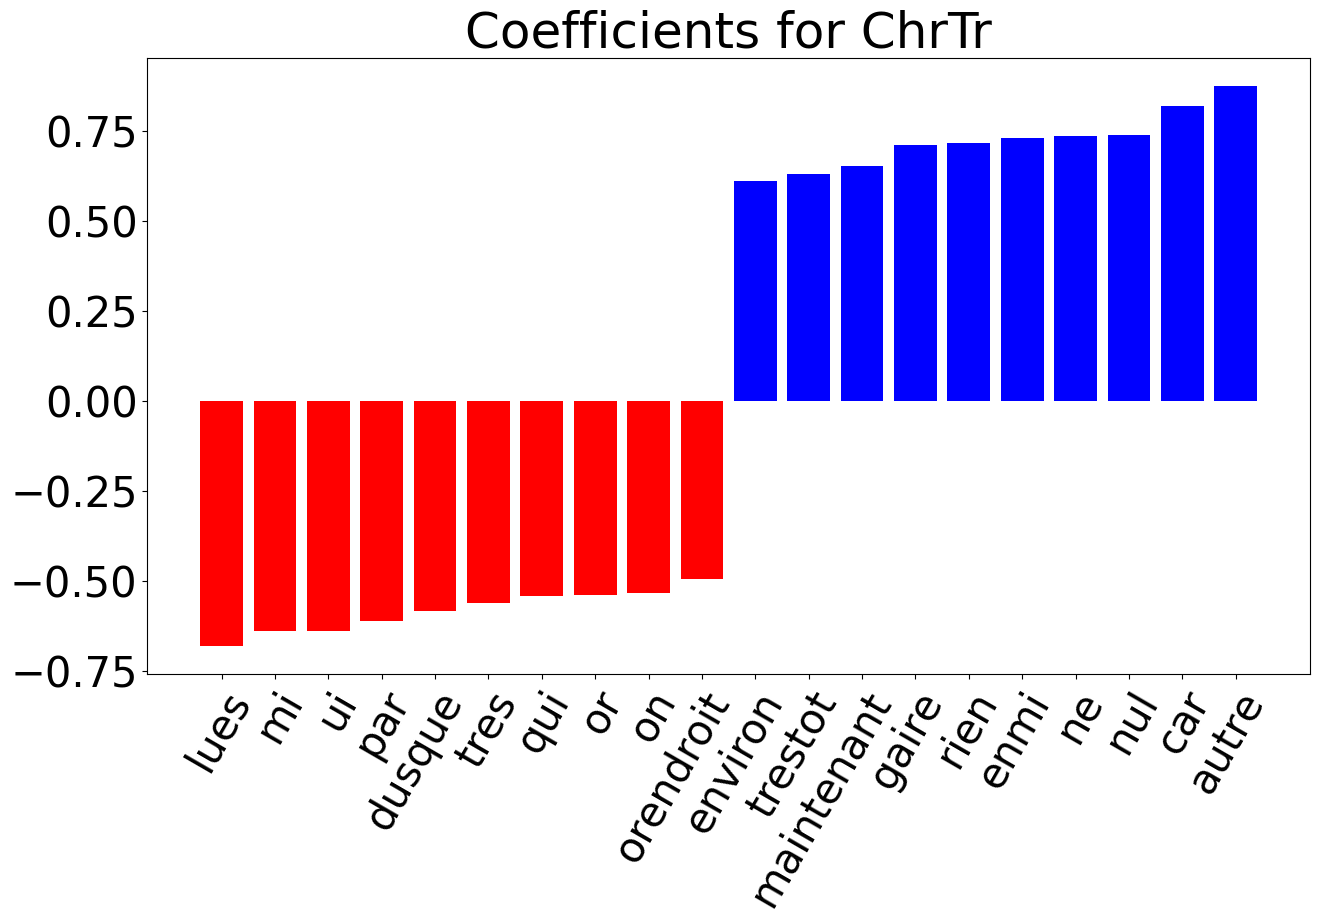

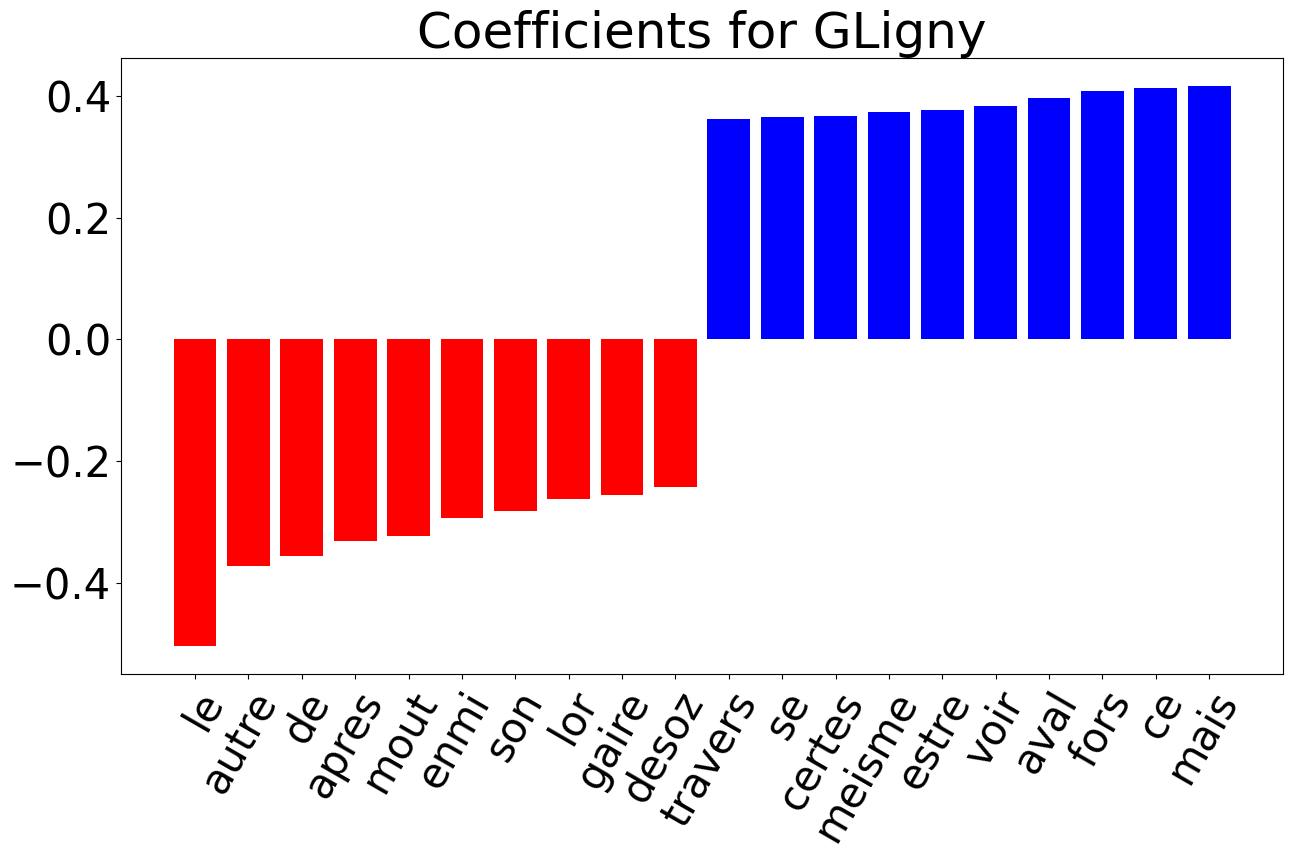

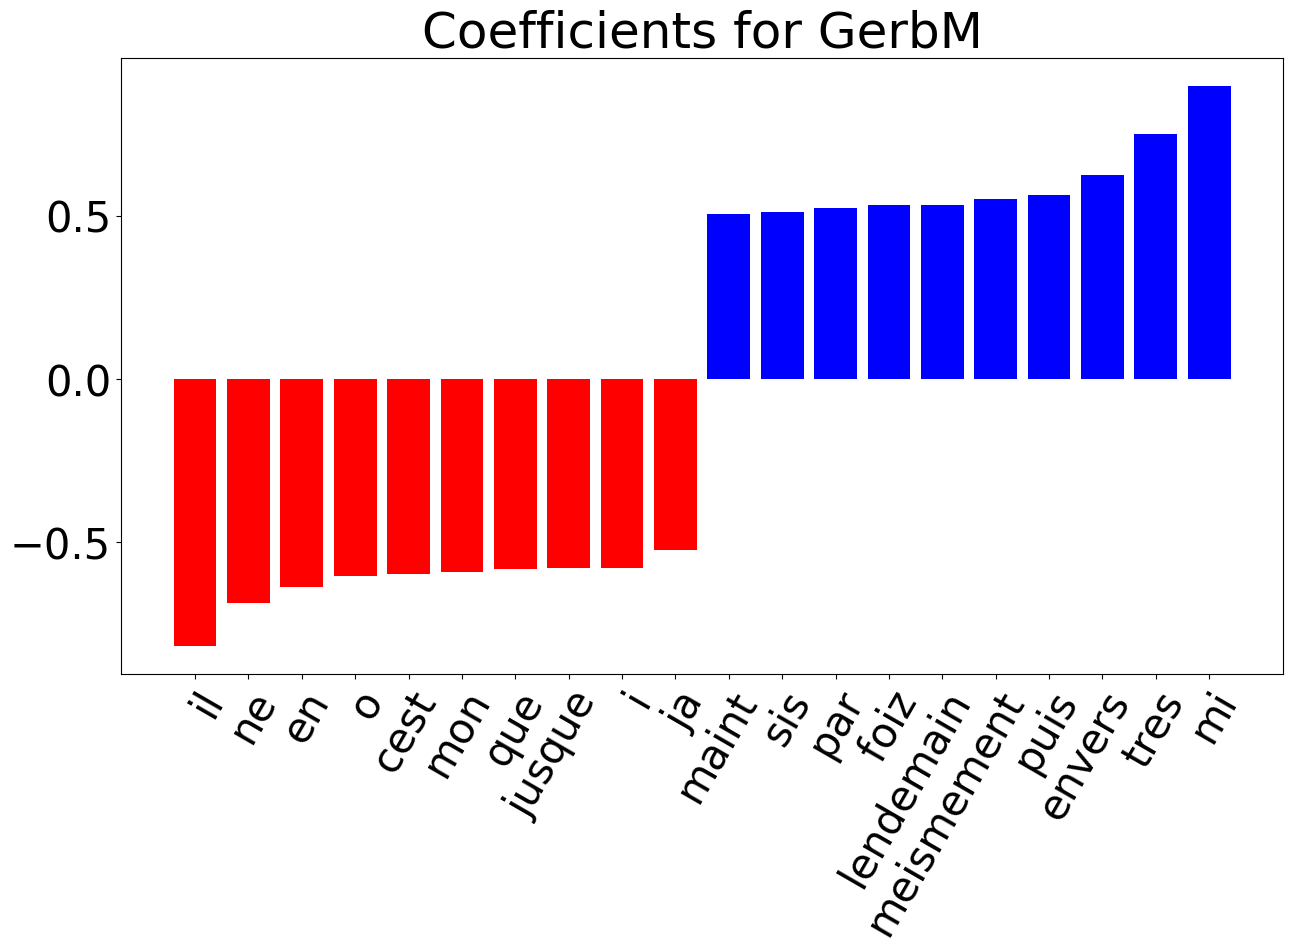

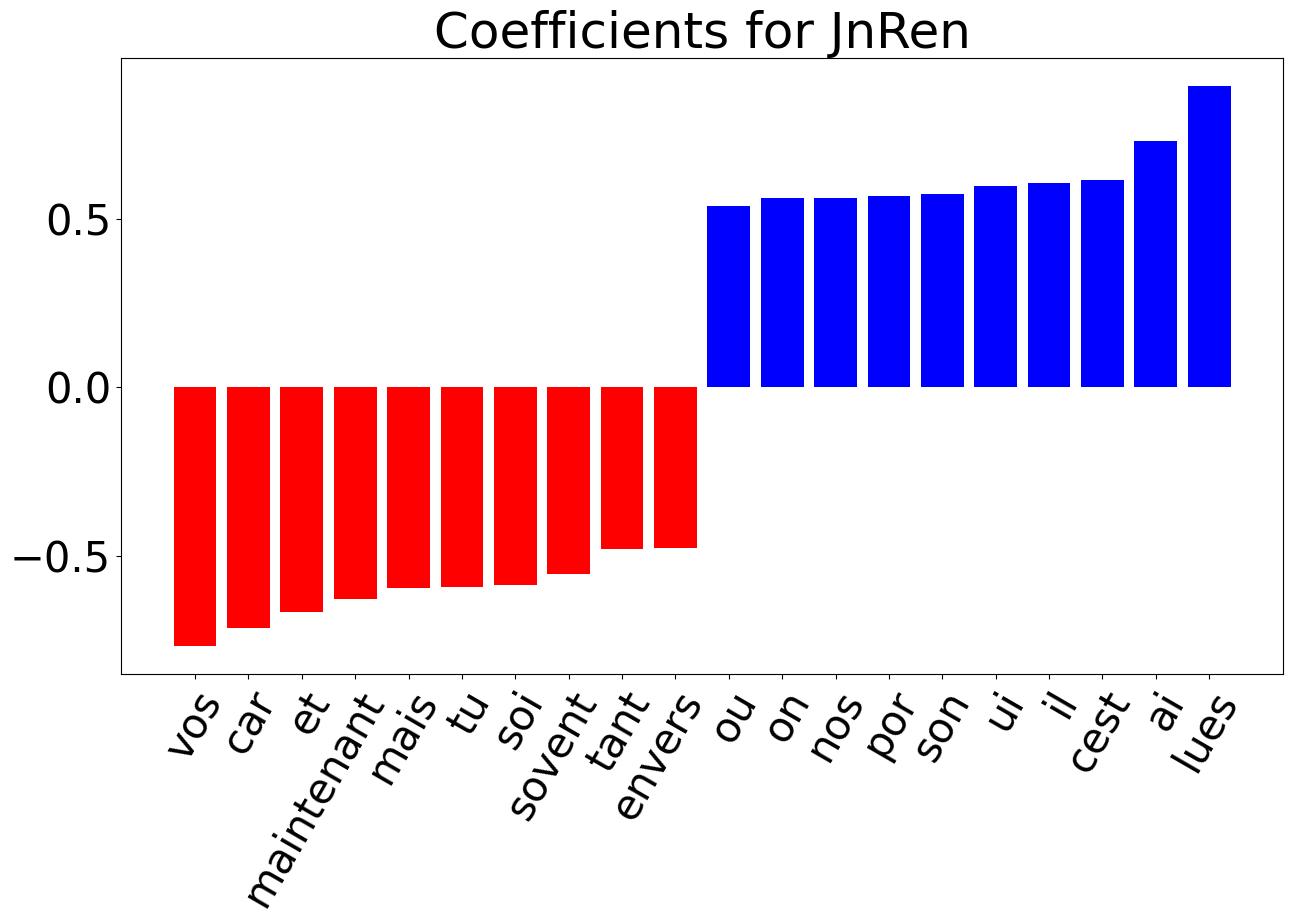

In [ ]:
# python load_corpus.py -o chrestien_fw 
#                       -s data/chrestien/data/v2/train/LEMMA/* 
#                       -t words -n 1 
#                       -f function_words_old-french_of3c.json 
#                       -x txt --sampling --sample_units words 
#                       --sample_size 3000 --samples_random --max_samples 100

f = "../data/function_words_old-french_of3c.json"
with open(f, 'r') as f:
    my_feats = json.loads(f.read())

data_paths = glob.glob("../data/v2/train/LEMMA/*")

chrestien_fw, feat_list = load_corpus(data_paths=data_paths,
                                      feats="words", n=1, feat_list=my_feats,
                                      format="txt", sampling=True, units="words", 
                                      size=3000, samples_random=True, max_samples=100)


# python train_svm.py chrestien_fw.csv
#                     --cross_validate k-fold 
#                     --k 10 --balance downsampling 
#                     --class_weights --get_coefs

results = train_svm(train=chrestien_fw,
                    test=None,
                    cross_validate="k-fold",
                    k=10,
                    balance="downsampling",
                    class_weights=True,
                    get_coefs=True
                    )

.......loading texts.......
.......getting features.......
.......getting counts.......
.......feeding data frame.......


100%|██████████| 2038/2038 [00:00<00:00, 4911.33it/s]


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]


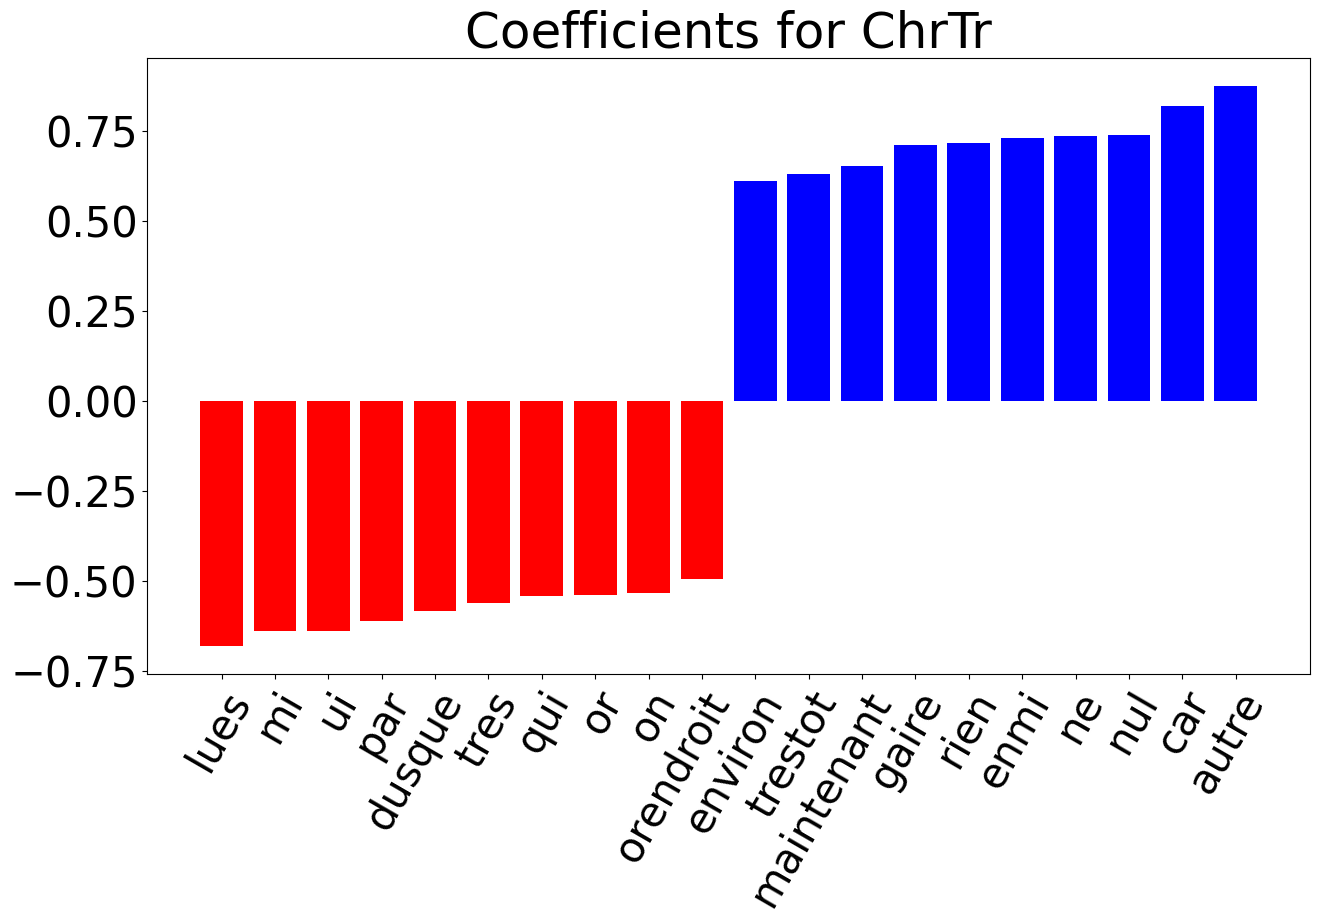

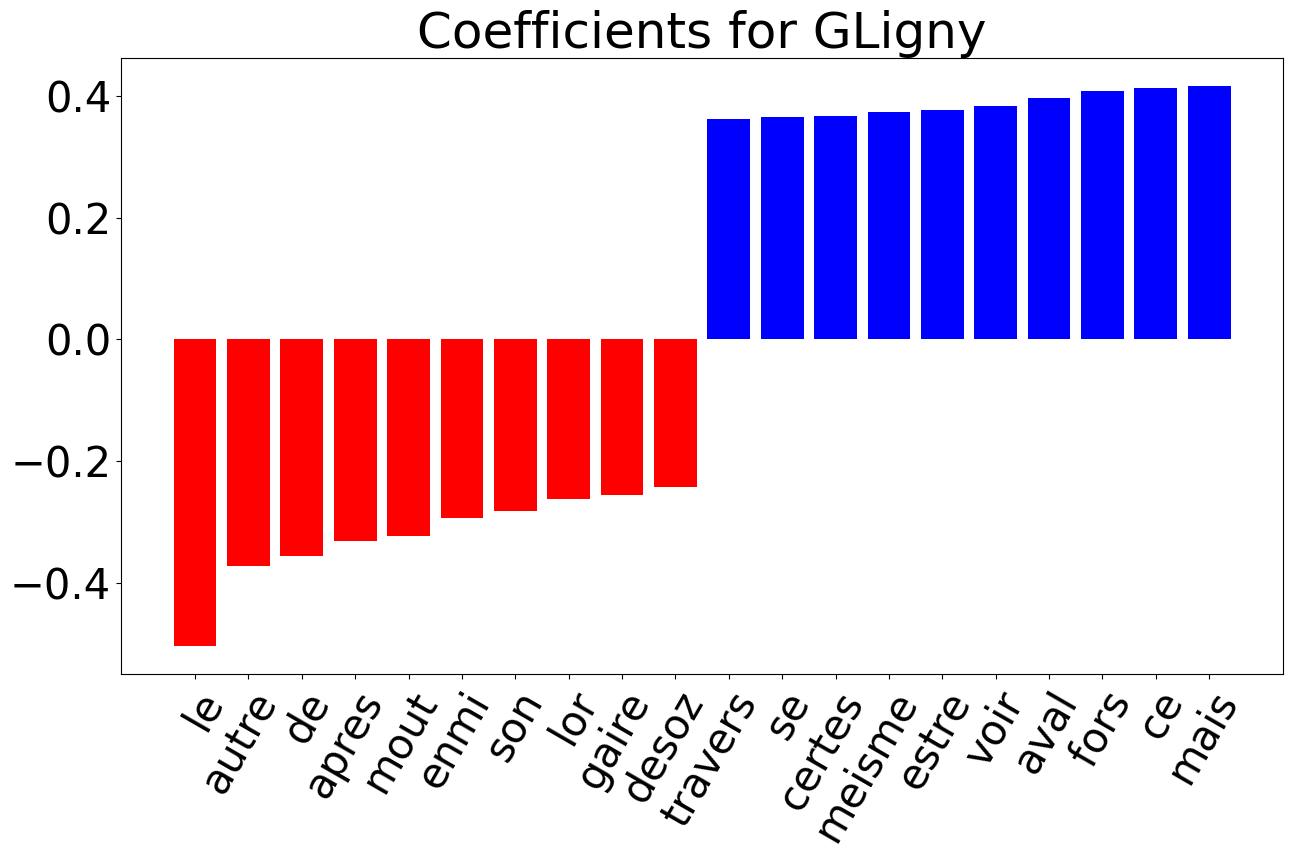

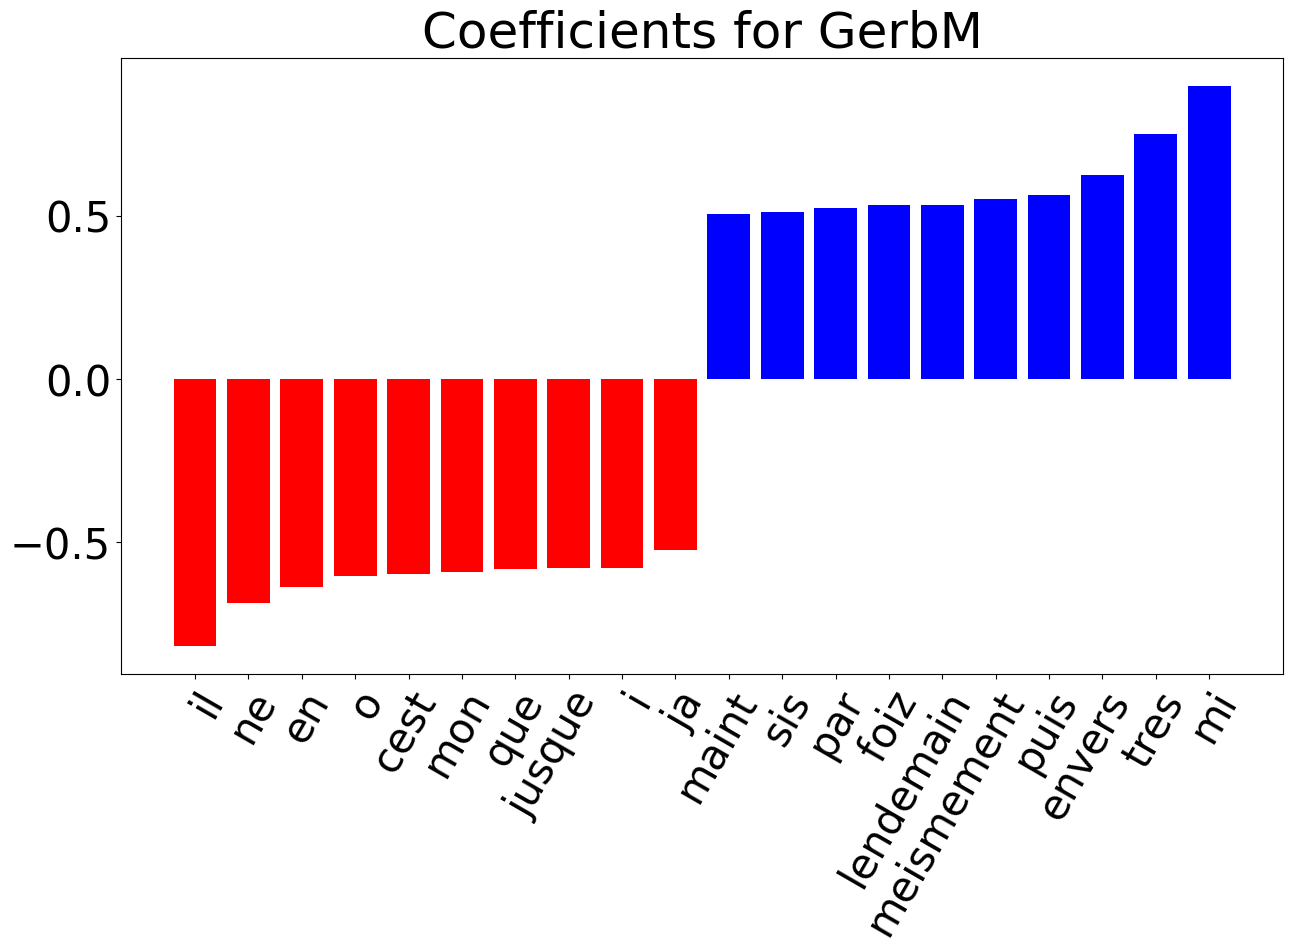

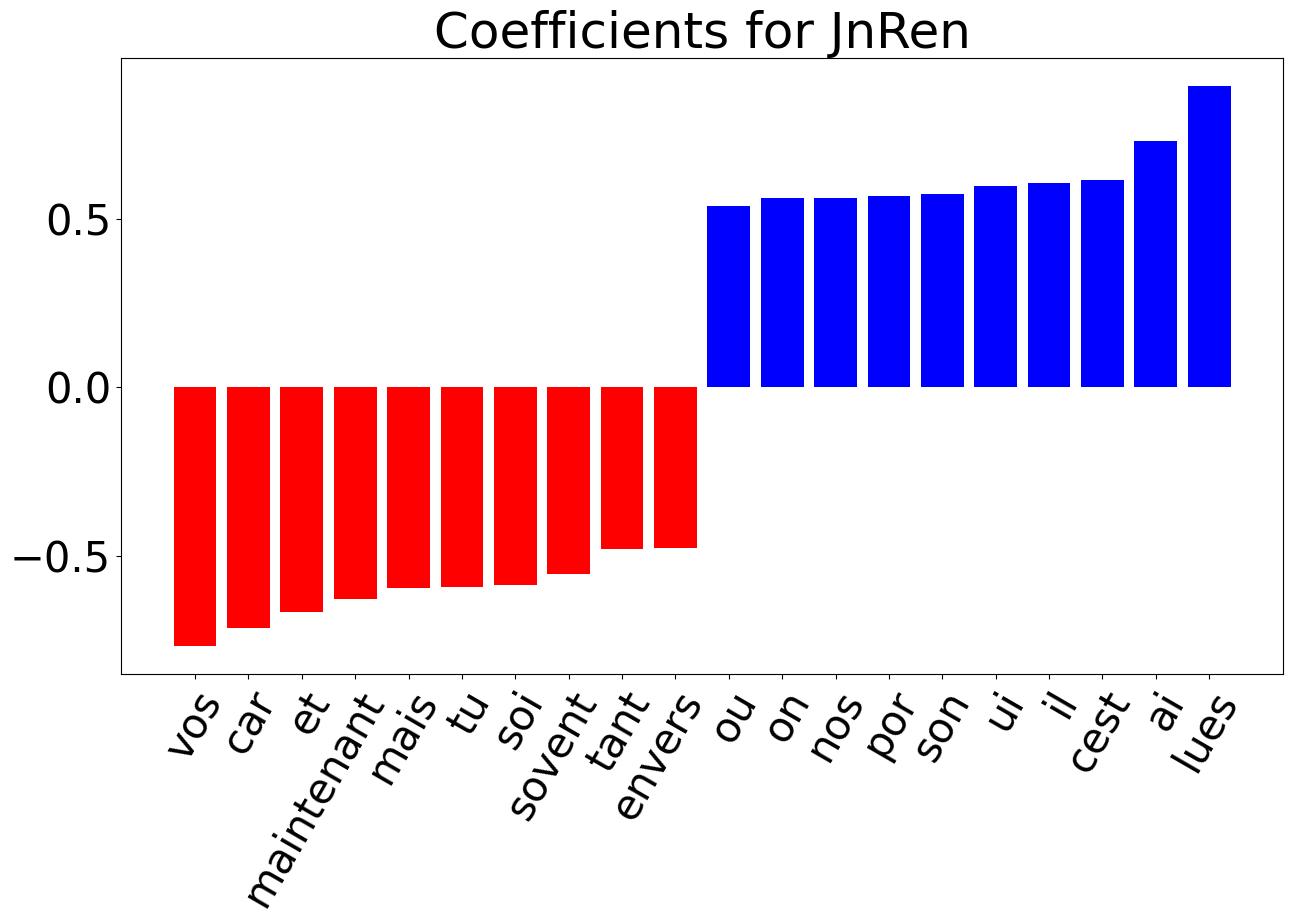

In [6]:
# python load_corpus.py -o chrestien_fw_unseen 
#                       -s data/chrestien/data/v2/unseen/LEMMA/* 
#                       -t words -n 1 -f function_words_old-french_of3c.json 
#                       -x txt --sampling --sample_units words 
#                       --sample_size 3000 --sample_step 100

data_paths = glob.glob("../data/v2/unseen/LEMMA/*")

chrestien_fw_unseen, feat_list = load_corpus(data_paths=data_paths,
                                             feats="words", n=1, feat_list=my_feats,
                                             format="txt", sampling=True, units="words", 
                                             size=3000, step=100)


# python train_svm.py chrestien_fw.csv 
#                     --balance downsampling 
#                     --class_weights --get_coefs 
#                     --test_path chrestien_fw_unseen.csv --final

results = train_svm(train=chrestien_fw,
                    test=chrestien_fw_unseen,
                    balance="downsampling",
                    class_weights=True,
                    get_coefs=True,
                    final_pred=True
                    )

# Benchmark Prosodie

### No words, no elisions


#### Verse n-gram

Comparison:

In [11]:
# python load_corpus.py -o chrestien_proso_train 
#                       -s data/chrestien/data/prosodie/train_nowordsnoelisions/* 
#                       -t words -n 1 -k 500 -x txt --sampling 
#                       --sample_units words --sample_size 300

# python train_svm.py chrestien_proso_train.csv --cross_validate group-k-fold --balance downsampling --class_weights --get_coefs


data_paths = glob.glob("../data/prosodie/JB/train_nowordsnoelisions/*")

gram_range = range(1,4)
prec_list = []

for n in gram_range:

    chrestien_proso_train, feat_list = load_corpus(data_paths=data_paths,
                                                feats="words", n=n, k=500,
                                                format="txt", sampling=True, units="words", 
                                                size=300)

    results = train_svm(train=chrestien_proso_train,
                        test=None,
                        cross_validate="group-k-fold",
                        balance="downsampling",
                        class_weights=True,
                        get_coefs=False
                        )

    results_list = results['classification_report'].split()
    acc_idx = results_list.index('accuracy')+1

    prec_list.append(results_list[acc_idx])

.......loading texts.......
.......getting features.......
.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 6854.42it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.73      0.91      0.81        44
GerbertDeMontreuil       0.61      1.00      0.76        22
        JeanRenart       0.83      0.40      0.54        48

          accuracy                           0.71       114
         macro avg       0.72      0.77      0.70       114
      weighted avg       0.75      0.71      0.68       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......getting features.......
.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 2254.57it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.60      0.70      0.65        44
GerbertDeMontreuil       0.63      0.86      0.73        22
        JeanRenart       0.50      0.33      0.40        48

          accuracy                           0.58       114
         macro avg       0.58      0.63      0.59       114
      weighted avg       0.56      0.58      0.56       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 4468.57it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.52      0.64      0.57        44
GerbertDeMontreuil       0.69      0.82      0.75        22
        JeanRenart       0.44      0.31      0.37        48

          accuracy                           0.54       114
         macro avg       0.55      0.59      0.56       114
      weighted avg       0.52      0.54      0.52       114



In [12]:
for n, prec in zip(gram_range, prec_list):
    print(f"n-gram = {n}: précision = {prec}")

n-gram = 1: précision = 0.71
n-gram = 2: précision = 0.58
n-gram = 3: précision = 0.54


#### Char n-gram

Comparison:

In [13]:
# python load_corpus.py -o chrestien_proso_train 
#                       -s data/chrestien/data/prosodie/train_nowordsnoelisions/* 
#                       -t chars -n 8 -k 500 -x txt --sampling 
#                       --sample_units words --sample_size 300


data_paths = glob.glob("../data/prosodie/JB/train_nowordsnoelisions/*")

gram_range = range(4,16)
prec_list = []

for n in gram_range:
    chrestien_proso_train, feat_list = load_corpus(data_paths=data_paths,
                                                feats="chars", n=n, k=500,
                                                format="txt", sampling=True, units="words", 
                                                size=300)

    results = train_svm(train=chrestien_proso_train,
                        test=None,
                        cross_validate="group-k-fold",
                        balance="downsampling",
                        class_weights=True,
                        get_coefs=False
                        )

    results_list = results['classification_report'].split()
    acc_idx = results_list.index('accuracy')+1

    prec_list.append(results_list[acc_idx])

.......loading texts.......
.......getting features.......
K Limit ignored because the size of the list is lower (51 < 500)
.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 35171.07it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.51      0.64      0.57        44
GerbertDeMontreuil       0.19      0.18      0.19        22
        JeanRenart       0.66      0.52      0.58        48

          accuracy                           0.50       114
         macro avg       0.45      0.45      0.44       114
      weighted avg       0.51      0.50      0.50       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (120 < 500)
.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 15255.91it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.54      0.61      0.57        44
GerbertDeMontreuil       0.12      0.14      0.13        22
        JeanRenart       0.72      0.60      0.66        48

          accuracy                           0.52       114
         macro avg       0.46      0.45      0.45       114
      weighted avg       0.54      0.52      0.52       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (268 < 500)
.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 3226.56it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.53      0.61      0.57        44
GerbertDeMontreuil       0.15      0.18      0.17        22
        JeanRenart       0.70      0.54      0.61        48

          accuracy                           0.50       114
         macro avg       0.46      0.45      0.45       114
      weighted avg       0.53      0.50      0.51       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 968.38it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.54      0.66      0.59        44
GerbertDeMontreuil       0.15      0.18      0.16        22
        JeanRenart       0.70      0.48      0.57        48

          accuracy                           0.49       114
         macro avg       0.46      0.44      0.44       114
      weighted avg       0.53      0.49      0.50       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......getting features.......
.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 569.49it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.58      0.73      0.65        44
GerbertDeMontreuil       0.50      0.41      0.45        22
        JeanRenart       0.71      0.60      0.65        48

          accuracy                           0.61       114
         macro avg       0.60      0.58      0.58       114
      weighted avg       0.62      0.61      0.61       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 464.74it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.62      0.84      0.71        44
GerbertDeMontreuil       0.82      0.64      0.72        22
        JeanRenart       0.78      0.60      0.68        48

          accuracy                           0.70       114
         macro avg       0.74      0.69      0.70       114
      weighted avg       0.73      0.70      0.70       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 363.16it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.70      0.84      0.76        44
GerbertDeMontreuil       0.87      0.91      0.89        22
        JeanRenart       0.76      0.60      0.67        48

          accuracy                           0.75       114
         macro avg       0.78      0.78      0.78       114
      weighted avg       0.76      0.75      0.75       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 388.94it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.75      0.82      0.78        44
GerbertDeMontreuil       0.87      0.91      0.89        22
        JeanRenart       0.77      0.69      0.73        48

          accuracy                           0.78       114
         macro avg       0.80      0.80      0.80       114
      weighted avg       0.78      0.78      0.78       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 462.34it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.75      0.86      0.80        44
GerbertDeMontreuil       0.78      0.95      0.86        22
        JeanRenart       0.81      0.60      0.69        48

          accuracy                           0.77       114
         macro avg       0.78      0.81      0.78       114
      weighted avg       0.78      0.77      0.76       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 455.89it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.72      0.82      0.77        44
GerbertDeMontreuil       0.75      0.95      0.84        22
        JeanRenart       0.75      0.56      0.64        48

          accuracy                           0.74       114
         macro avg       0.74      0.78      0.75       114
      weighted avg       0.74      0.74      0.73       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 485.44it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.69      0.77      0.73        44
GerbertDeMontreuil       0.72      0.95      0.82        22
        JeanRenart       0.72      0.54      0.62        48

          accuracy                           0.71       114
         macro avg       0.71      0.76      0.72       114
      weighted avg       0.71      0.71      0.70       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 426.65it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.65      0.73      0.69        44
GerbertDeMontreuil       0.72      0.82      0.77        22
        JeanRenart       0.62      0.52      0.57        48

          accuracy                           0.66       114
         macro avg       0.67      0.69      0.67       114
      weighted avg       0.65      0.66      0.65       114



In [14]:
for n, prec in zip(gram_range, prec_list):
    print(f"n-gram = {n}: précision = {prec}")

n-gram = 4: précision = 0.50
n-gram = 5: précision = 0.52
n-gram = 6: précision = 0.50
n-gram = 7: précision = 0.49
n-gram = 8: précision = 0.61
n-gram = 9: précision = 0.70
n-gram = 10: précision = 0.75
n-gram = 11: précision = 0.78
n-gram = 12: précision = 0.77
n-gram = 13: précision = 0.74
n-gram = 14: précision = 0.71
n-gram = 15: précision = 0.66


#### Adding culling

Comparison for the 11-gram:

In [15]:
# python load_corpus.py -o chrestien_proso_train 
#                       -s data/chrestien/data/prosodie/train_nowordsnoelisions/* 
#                       -t chars -n 11 --culling 60 -x txt --sampling 
#                       --sample_units words --sample_size 300


data_paths = glob.glob("../data/prosodie/JB/train_nowordsnoelisions/*")

culling_range = range(0,90,10)
prec_list = []

for c in culling_range:
    chrestien_proso_train, feat_list = load_corpus(data_paths=data_paths,
                                                feats="chars", n=11, culling=c,
                                                format="txt", sampling=True, units="words", 
                                                size=300)

    results = train_svm(train=chrestien_proso_train,
                        test=None,
                        cross_validate="group-k-fold",
                        balance="downsampling",
                        class_weights=True,
                        get_coefs=False
                        )

    results_list = results['classification_report'].split()
    acc_idx = results_list.index('accuracy')+1

    prec_list.append(results_list[acc_idx])

.......loading texts.......
.......getting features.......
.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:02<00:00, 47.62it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished


                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.67      0.95      0.79        44
GerbertDeMontreuil       0.66      0.95      0.78        22
        JeanRenart       0.84      0.33      0.48        48

          accuracy                           0.69       114
         macro avg       0.72      0.75      0.68       114
      weighted avg       0.74      0.69      0.65       114

.......loading texts.......
.......getting features.......
.......getting counts.......
.......Culling at 10%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:01<00:00, 67.68it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.71      0.84      0.77        44
GerbertDeMontreuil       0.81      1.00      0.90        22
        JeanRenart       0.80      0.58      0.67        48

          accuracy                           0.76       114
         macro avg       0.78      0.81      0.78       114
      weighted avg       0.77      0.76      0.75       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 81.74it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.74      0.84      0.79        44
GerbertDeMontreuil       0.84      0.95      0.89        22
        JeanRenart       0.79      0.65      0.71        48

          accuracy                           0.78       114
         macro avg       0.79      0.81      0.80       114
      weighted avg       0.78      0.78      0.78       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 103.53it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.75      0.86      0.80        44
GerbertDeMontreuil       0.83      0.91      0.87        22
        JeanRenart       0.79      0.65      0.71        48

          accuracy                           0.78       114
         macro avg       0.79      0.81      0.79       114
      weighted avg       0.78      0.78      0.78       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 120.67it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.73      0.84      0.78        44
GerbertDeMontreuil       0.88      0.95      0.91        22
        JeanRenart       0.79      0.65      0.71        48

          accuracy                           0.78       114
         macro avg       0.80      0.81      0.80       114
      weighted avg       0.78      0.78      0.78       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 132.21it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.73      0.86      0.79        44
GerbertDeMontreuil       0.87      0.91      0.89        22
        JeanRenart       0.79      0.65      0.71        48

          accuracy                           0.78       114
         macro avg       0.80      0.81      0.80       114
      weighted avg       0.78      0.78      0.78       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 162.45it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.75      0.82      0.78        44
GerbertDeMontreuil       0.91      0.91      0.91        22
        JeanRenart       0.77      0.71      0.74        48

          accuracy                           0.79       114
         macro avg       0.81      0.81      0.81       114
      weighted avg       0.79      0.79      0.79       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 252.26it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.77      0.84      0.80        44
GerbertDeMontreuil       0.74      0.91      0.82        22
        JeanRenart       0.77      0.62      0.69        48

          accuracy                           0.76       114
         macro avg       0.76      0.79      0.77       114
      weighted avg       0.76      0.76      0.76       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 320.17it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.74      0.80      0.77        44
GerbertDeMontreuil       0.69      0.91      0.78        22
        JeanRenart       0.74      0.58      0.65        48

          accuracy                           0.73       114
         macro avg       0.72      0.76      0.73       114
      weighted avg       0.73      0.73      0.72       114




[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


In [16]:
for c, prec in zip(culling_range, prec_list):
    print(f"culling = {c}%: précision = {prec}")

culling = 0%: précision = 0.69
culling = 10%: précision = 0.76
culling = 20%: précision = 0.78
culling = 30%: précision = 0.78
culling = 40%: précision = 0.78
culling = 50%: précision = 0.78
culling = 60%: précision = 0.79
culling = 70%: précision = 0.76
culling = 80%: précision = 0.73


Double list?

In [17]:
# python load_corpus.py -o chrestien_proso_train 
#                       -s data/chrestien/data/prosodie/train_nowordsnoelisions/* 
#                       -t chars -n 11 --culling 60 -x txt --sampling 
#                       --sample_units words --sample_size 300


data_paths = glob.glob("../data/prosodie/JB/train_nowordsnoelisions/*")

culling_range = range(0,90,10)
gram_range = range(4,16)
prec_list = np.zeros((len(gram_range), len(culling_range)))

for i, n in enumerate(gram_range):
    for j, c in enumerate(culling_range):
        chrestien_proso_train, feat_list = load_corpus(data_paths=data_paths,
                                                    feats="chars", n=n, culling=c,
                                                    format="txt", sampling=True, units="words", 
                                                    size=300)

        results = train_svm(train=chrestien_proso_train,
                            test=None,
                            cross_validate="group-k-fold",
                            balance="downsampling",
                            class_weights=True,
                            get_coefs=False
                            )

        results_list = results['classification_report'].split()
        acc_idx = results_list.index('accuracy')+1

        prec_list[i, j] = results_list[acc_idx]

.......loading texts.......
.......getting features.......
K Limit ignored because the size of the list is lower (51 < 5000)
.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 57188.21it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.51      0.64      0.57        44
GerbertDeMontreuil       0.19      0.18      0.19        22
        JeanRenart       0.66      0.52      0.58        48

          accuracy                           0.50       114
         macro avg       0.45      0.45      0.44       114
      weighted avg       0.51      0.50      0.50       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (51 < 5000)
.......getting counts.......
.......Culling at 10%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 31613.27it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.49      0.57      0.53        44
GerbertDeMontreuil       0.18      0.18      0.18        22
        JeanRenart       0.61      0.52      0.56        48

          accuracy                           0.47       114
         macro avg       0.43      0.42      0.42       114
      weighted avg       0.48      0.47      0.47       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (51 < 5000)
.......getting counts.......
.......Culling at 20%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 41427.02it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.50      0.57      0.53        44
GerbertDeMontreuil       0.21      0.23      0.22        22
        JeanRenart       0.62      0.52      0.57        48

          accuracy                           0.48       114
         macro avg       0.44      0.44      0.44       114
      weighted avg       0.50      0.48      0.49       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (51 < 5000)
.......getting counts.......
.......Culling at 30%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 26319.74it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.53      0.64      0.58        44
GerbertDeMontreuil       0.23      0.23      0.23        22
        JeanRenart       0.62      0.50      0.55        48

          accuracy                           0.50       114
         macro avg       0.46      0.45      0.45       114
      weighted avg       0.51      0.50      0.50       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (51 < 5000)
.......getting counts.......
.......Culling at 40%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 39042.27it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.52      0.61      0.56        44
GerbertDeMontreuil       0.17      0.18      0.17        22
        JeanRenart       0.61      0.48      0.53        48

          accuracy                           0.47       114
         macro avg       0.43      0.42      0.42       114
      weighted avg       0.49      0.47      0.48       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (51 < 5000)
.......getting counts.......
.......Culling at 50%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 34533.49it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.50      0.57      0.53        44
GerbertDeMontreuil       0.19      0.23      0.21        22
        JeanRenart       0.58      0.46      0.51        48

          accuracy                           0.46       114
         macro avg       0.42      0.42      0.42       114
      weighted avg       0.47      0.46      0.46       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (51 < 5000)
.......getting counts.......
.......Culling at 60%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 40411.65it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.52      0.64      0.57        44
GerbertDeMontreuil       0.19      0.23      0.20        22
        JeanRenart       0.64      0.44      0.52        48

          accuracy                           0.47       114
         macro avg       0.45      0.43      0.43       114
      weighted avg       0.50      0.47      0.48       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (51 < 5000)
.......getting counts.......
.......Culling at 70%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 31607.00it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.52      0.64      0.57        44
GerbertDeMontreuil       0.19      0.23      0.20        22
        JeanRenart       0.64      0.44      0.52        48

          accuracy                           0.47       114
         macro avg       0.45      0.43      0.43       114
      weighted avg       0.50      0.47      0.48       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (51 < 5000)
.......getting counts.......
.......Culling at 80%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 31337.70it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.54      0.64      0.58        44
GerbertDeMontreuil       0.25      0.32      0.28        22
        JeanRenart       0.65      0.46      0.54        48

          accuracy                           0.50       114
         macro avg       0.48      0.47      0.47       114
      weighted avg       0.53      0.50      0.51       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (120 < 5000)
.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 11680.16it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.54      0.61      0.57        44
GerbertDeMontreuil       0.12      0.14      0.13        22
        JeanRenart       0.72      0.60      0.66        48

          accuracy                           0.52       114
         macro avg       0.46      0.45      0.45       114
      weighted avg       0.54      0.52      0.52       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (120 < 5000)
.......getting counts.......
.......Culling at 10%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 14403.00it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.49      0.57      0.53        44
GerbertDeMontreuil       0.18      0.18      0.18        22
        JeanRenart       0.68      0.58      0.63        48

          accuracy                           0.50       114
         macro avg       0.45      0.44      0.45       114
      weighted avg       0.51      0.50      0.50       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (120 < 5000)
.......getting counts.......
.......Culling at 20%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 13265.01it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.49      0.57      0.53        44
GerbertDeMontreuil       0.18      0.18      0.18        22
        JeanRenart       0.68      0.58      0.63        48

          accuracy                           0.50       114
         macro avg       0.45      0.44      0.45       114
      weighted avg       0.51      0.50      0.50       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (120 < 5000)
.......getting counts.......
.......Culling at 30%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 12633.11it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.52      0.59      0.55        44
GerbertDeMontreuil       0.14      0.14      0.14        22
        JeanRenart       0.70      0.62      0.66        48

          accuracy                           0.52       114
         macro avg       0.45      0.45      0.45       114
      weighted avg       0.52      0.52      0.52       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (120 < 5000)
.......getting counts.......
.......Culling at 40%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 9600.84it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.51      0.59      0.55        44
GerbertDeMontreuil       0.14      0.14      0.14        22
        JeanRenart       0.68      0.58      0.63        48

          accuracy                           0.50       114
         macro avg       0.44      0.44      0.44       114
      weighted avg       0.51      0.50      0.50       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (120 < 5000)
.......getting counts.......
.......Culling at 50%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 13783.93it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.53      0.61      0.57        44
GerbertDeMontreuil       0.15      0.14      0.14        22
        JeanRenart       0.70      0.62      0.66        48

          accuracy                           0.53       114
         macro avg       0.46      0.46      0.46       114
      weighted avg       0.53      0.53      0.52       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (120 < 5000)
.......getting counts.......
.......Culling at 60%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 12908.34it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.51      0.57      0.54        44
GerbertDeMontreuil       0.23      0.23      0.23        22
        JeanRenart       0.65      0.58      0.62        48

          accuracy                           0.51       114
         macro avg       0.46      0.46      0.46       114
      weighted avg       0.51      0.51      0.51       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (120 < 5000)
.......getting counts.......
.......Culling at 70%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 14270.17it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.50      0.57      0.53        44
GerbertDeMontreuil       0.23      0.23      0.23        22
        JeanRenart       0.64      0.56      0.60        48

          accuracy                           0.50       114
         macro avg       0.46      0.45      0.45       114
      weighted avg       0.51      0.50      0.50       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (120 < 5000)
.......getting counts.......
.......Culling at 80%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 12080.31it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.52      0.59      0.55        44
GerbertDeMontreuil       0.24      0.23      0.23        22
        JeanRenart       0.65      0.58      0.62        48

          accuracy                           0.52       114
         macro avg       0.47      0.47      0.47       114
      weighted avg       0.52      0.52      0.52       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (268 < 5000)
.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 3294.39it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.53      0.61      0.57        44
GerbertDeMontreuil       0.15      0.18      0.17        22
        JeanRenart       0.70      0.54      0.61        48

          accuracy                           0.50       114
         macro avg       0.46      0.45      0.45       114
      weighted avg       0.53      0.50      0.51       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (268 < 5000)
.......getting counts.......
.......Culling at 10%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 3518.04it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.51      0.57      0.54        44
GerbertDeMontreuil       0.19      0.23      0.21        22
        JeanRenart       0.69      0.56      0.62        48

          accuracy                           0.50       114
         macro avg       0.46      0.45      0.46       114
      weighted avg       0.53      0.50      0.51       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (268 < 5000)
.......getting counts.......
.......Culling at 20%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 3540.76it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.53      0.59      0.56        44
GerbertDeMontreuil       0.20      0.23      0.21        22
        JeanRenart       0.72      0.60      0.66        48

          accuracy                           0.53       114
         macro avg       0.49      0.47      0.48       114
      weighted avg       0.55      0.53      0.53       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (268 < 5000)
.......getting counts.......
.......Culling at 30%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 3654.86it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.51      0.57      0.54        44
GerbertDeMontreuil       0.24      0.27      0.26        22
        JeanRenart       0.68      0.56      0.61        48

          accuracy                           0.51       114
         macro avg       0.48      0.47      0.47       114
      weighted avg       0.53      0.51      0.52       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (268 < 5000)
.......getting counts.......
.......Culling at 40%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 3572.71it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.53      0.57      0.55        44
GerbertDeMontreuil       0.24      0.27      0.26        22
        JeanRenart       0.71      0.62      0.67        48

          accuracy                           0.54       114
         macro avg       0.50      0.49      0.49       114
      weighted avg       0.55      0.54      0.54       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (268 < 5000)
.......getting counts.......
.......Culling at 50%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 3245.15it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.57      0.66      0.61        44
GerbertDeMontreuil       0.29      0.27      0.28        22
        JeanRenart       0.71      0.62      0.67        48

          accuracy                           0.57       114
         macro avg       0.52      0.52      0.52       114
      weighted avg       0.58      0.57      0.57       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (268 < 5000)
.......getting counts.......
.......Culling at 60%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 4154.54it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.54      0.64      0.58        44
GerbertDeMontreuil       0.25      0.27      0.26        22
        JeanRenart       0.71      0.56      0.63        48

          accuracy                           0.54       114
         macro avg       0.50      0.49      0.49       114
      weighted avg       0.56      0.54      0.54       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (268 < 5000)
.......getting counts.......
.......Culling at 70%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 4197.88it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.56      0.66      0.60        44
GerbertDeMontreuil       0.29      0.32      0.30        22
        JeanRenart       0.71      0.56      0.63        48

          accuracy                           0.55       114
         macro avg       0.52      0.51      0.51       114
      weighted avg       0.57      0.55      0.56       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (268 < 5000)
.......getting counts.......
.......Culling at 80%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 3795.27it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.50      0.57      0.53        44
GerbertDeMontreuil       0.23      0.23      0.23        22
        JeanRenart       0.64      0.56      0.60        48

          accuracy                           0.50       114
         macro avg       0.46      0.45      0.45       114
      weighted avg       0.51      0.50      0.50       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (573 < 5000)
.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 1023.00it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.55      0.64      0.59        44
GerbertDeMontreuil       0.15      0.18      0.17        22
        JeanRenart       0.70      0.54      0.61        48

          accuracy                           0.51       114
         macro avg       0.47      0.45      0.46       114
      weighted avg       0.54      0.51      0.52       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......getting features.......
K Limit ignored because the size of the list is lower (573 < 5000)
.......getting counts.......
.......Culling at 10%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 1241.97it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.52      0.59      0.55        44
GerbertDeMontreuil       0.28      0.32      0.30        22
        JeanRenart       0.72      0.58      0.64        48

          accuracy                           0.54       114
         macro avg       0.51      0.50      0.50       114
      weighted avg       0.56      0.54      0.54       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (573 < 5000)
.......getting counts.......
.......Culling at 20%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 1256.10it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.55      0.59      0.57        44
GerbertDeMontreuil       0.32      0.36      0.34        22
        JeanRenart       0.71      0.62      0.67        48

          accuracy                           0.56       114
         macro avg       0.53      0.53      0.53       114
      weighted avg       0.58      0.56      0.57       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (573 < 5000)
.......getting counts.......
.......Culling at 30%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 1288.45it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.57      0.64      0.60        44
GerbertDeMontreuil       0.29      0.32      0.30        22
        JeanRenart       0.73      0.62      0.67        48

          accuracy                           0.57       114
         macro avg       0.53      0.53      0.53       114
      weighted avg       0.58      0.57      0.57       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (573 < 5000)
.......getting counts.......
.......Culling at 40%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 1556.59it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.57      0.68      0.62        44
GerbertDeMontreuil       0.29      0.27      0.28        22
        JeanRenart       0.72      0.60      0.66        48

          accuracy                           0.57       114
         macro avg       0.53      0.52      0.52       114
      weighted avg       0.58      0.57      0.57       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (573 < 5000)
.......getting counts.......
.......Culling at 50%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 1356.75it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.56      0.68      0.61        44
GerbertDeMontreuil       0.29      0.27      0.28        22
        JeanRenart       0.74      0.60      0.67        48

          accuracy                           0.57       114
         macro avg       0.53      0.52      0.52       114
      weighted avg       0.58      0.57      0.57       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (573 < 5000)
.......getting counts.......
.......Culling at 60%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 1542.76it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.56      0.66      0.60        44
GerbertDeMontreuil       0.27      0.27      0.27        22
        JeanRenart       0.75      0.62      0.68        48

          accuracy                           0.57       114
         macro avg       0.53      0.52      0.52       114
      weighted avg       0.58      0.57      0.57       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (573 < 5000)
.......getting counts.......
.......Culling at 70%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 1551.44it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.55      0.64      0.59        44
GerbertDeMontreuil       0.29      0.27      0.28        22
        JeanRenart       0.74      0.65      0.69        48

          accuracy                           0.57       114
         macro avg       0.52      0.52      0.52       114
      weighted avg       0.58      0.57      0.57       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (573 < 5000)
.......getting counts.......
.......Culling at 80%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 1865.02it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.55      0.68      0.61        44
GerbertDeMontreuil       0.26      0.23      0.24        22
        JeanRenart       0.75      0.62      0.68        48

          accuracy                           0.57       114
         macro avg       0.52      0.51      0.51       114
      weighted avg       0.58      0.57      0.57       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


K Limit ignored because the size of the list is lower (1164 < 5000)
.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 321.82it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.62      0.80      0.70        44
GerbertDeMontreuil       0.38      0.41      0.39        22
        JeanRenart       0.68      0.48      0.56        48

          accuracy                           0.59       114
         macro avg       0.56      0.56      0.55       114
      weighted avg       0.60      0.59      0.58       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 384.94it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.61      0.70      0.65        44
GerbertDeMontreuil       0.50      0.41      0.45        22
        JeanRenart       0.71      0.67      0.69        48

          accuracy                           0.63       114
         macro avg       0.61      0.59      0.60       114
      weighted avg       0.63      0.63      0.63       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 389.30it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.62      0.73      0.67        44
GerbertDeMontreuil       0.53      0.41      0.46        22
        JeanRenart       0.76      0.71      0.73        48

          accuracy                           0.66       114
         macro avg       0.63      0.61      0.62       114
      weighted avg       0.66      0.66      0.65       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 373.02it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.63      0.73      0.67        44
GerbertDeMontreuil       0.44      0.36      0.40        22
        JeanRenart       0.73      0.69      0.71        48

          accuracy                           0.64       114
         macro avg       0.60      0.59      0.59       114
      weighted avg       0.64      0.64      0.64       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 430.67it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.61      0.75      0.67        44
GerbertDeMontreuil       0.50      0.36      0.42        22
        JeanRenart       0.75      0.69      0.72        48

          accuracy                           0.65       114
         macro avg       0.62      0.60      0.60       114
      weighted avg       0.65      0.65      0.64       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 623.45it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.55      0.70      0.62        44
GerbertDeMontreuil       0.40      0.27      0.32        22
        JeanRenart       0.74      0.67      0.70        48

          accuracy                           0.61       114
         macro avg       0.57      0.55      0.55       114
      weighted avg       0.60      0.61      0.60       114

.......loading texts.......
.......getting features.......
K Limit ignored because the size of the list is lower (1164 < 5000)
.......getting counts.......
.......Culling at 60%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 689.42it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.57      0.68      0.62        44
GerbertDeMontreuil       0.47      0.32      0.38        22
        JeanRenart       0.74      0.71      0.72        48

          accuracy                           0.62       114
         macro avg       0.59      0.57      0.57       114
      weighted avg       0.62      0.62      0.62       114

.......loading texts.......
.......getting features.......
K Limit ignored because the size of the list is lower (1164 < 5000)
.......getting counts.......
.......Culling at 70%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 686.65it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.56      0.70      0.63        44
GerbertDeMontreuil       0.50      0.36      0.42        22
        JeanRenart       0.74      0.67      0.70        48

          accuracy                           0.62       114
         macro avg       0.60      0.58      0.58       114
      weighted avg       0.63      0.62      0.62       114

.......loading texts.......
.......getting features.......
K Limit ignored because the size of the list is lower (1164 < 5000)
.......getting counts.......
.......Culling at 80%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 737.46it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.59      0.73      0.65        44
GerbertDeMontreuil       0.44      0.36      0.40        22
        JeanRenart       0.76      0.67      0.71        48

          accuracy                           0.63       114
         macro avg       0.60      0.59      0.59       114
      weighted avg       0.64      0.63      0.63       114

.......loadin


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......getting features.......
K Limit ignored because the size of the list is lower (2220 < 5000)
.......getting counts.......
.......feeding data frame.......


100%|██████████| 114/114 [00:00<00:00, 158.03it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.67      0.82      0.73        44
GerbertDeMontreuil       0.62      0.82      0.71        22
        JeanRenart       0.68      0.44      0.53        48

          accuracy                           0.66       114
         macro avg       0.65      0.69      0.66       114
      weighted avg       0.66      0.66      0.64       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 202.22it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.70      0.80      0.74        44
GerbertDeMontreuil       0.76      0.86      0.81        22
        JeanRenart       0.77      0.62      0.69        48

          accuracy                           0.74       114
         macro avg       0.74      0.76      0.75       114
      weighted avg       0.74      0.74      0.73       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 227.73it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.74      0.77      0.76        44
GerbertDeMontreuil       0.79      0.86      0.83        22
        JeanRenart       0.77      0.71      0.74        48

          accuracy                           0.76       114
         macro avg       0.77      0.78      0.77       114
      weighted avg       0.76      0.76      0.76       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 205.99it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.71      0.84      0.77        44
GerbertDeMontreuil       0.81      0.77      0.79        22
        JeanRenart       0.78      0.67      0.72        48

          accuracy                           0.75       114
         macro avg       0.77      0.76      0.76       114
      weighted avg       0.76      0.75      0.75       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 281.32it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.64      0.86      0.74        44
GerbertDeMontreuil       0.83      0.68      0.75        22
        JeanRenart       0.81      0.62      0.71        48

          accuracy                           0.73       114
         macro avg       0.76      0.72      0.73       114
      weighted avg       0.75      0.73      0.73       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 306.35it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.61      0.80      0.69        44
GerbertDeMontreuil       0.76      0.59      0.67        22
        JeanRenart       0.78      0.65      0.70        48

          accuracy                           0.69       114
         macro avg       0.72      0.68      0.69       114
      weighted avg       0.71      0.69      0.69       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 406.19it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.63      0.77      0.69        44
GerbertDeMontreuil       0.75      0.68      0.71        22
        JeanRenart       0.75      0.62      0.68        48

          accuracy                           0.69       114
         macro avg       0.71      0.69      0.70       114
      weighted avg       0.70      0.69      0.69       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 457.48it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.63      0.75      0.69        44
GerbertDeMontreuil       0.65      0.59      0.62        22
        JeanRenart       0.76      0.67      0.71        48

          accuracy                           0.68       114
         macro avg       0.68      0.67      0.67       114
      weighted avg       0.69      0.68      0.68       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 569.49it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.65      0.73      0.69        44
GerbertDeMontreuil       0.70      0.64      0.67        22
        JeanRenart       0.73      0.69      0.71        48

          accuracy                           0.69       114
         macro avg       0.70      0.68      0.69       114
      weighted avg       0.70      0.69      0.69       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 88.40it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.71      0.89      0.79        44
GerbertDeMontreuil       0.62      0.95      0.75        22
        JeanRenart       0.76      0.40      0.52        48

          accuracy                           0.69       114
         macro avg       0.70      0.75      0.69       114
      weighted avg       0.71      0.69      0.67       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 122.75it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.74      0.84      0.79        44
GerbertDeMontreuil       0.80      0.91      0.85        22
        JeanRenart       0.79      0.65      0.71        48

          accuracy                           0.77       114
         macro avg       0.78      0.80      0.78       114
      weighted avg       0.77      0.77      0.77       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 134.66it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.71      0.77      0.74        44
GerbertDeMontreuil       0.83      0.91      0.87        22
        JeanRenart       0.71      0.62      0.67        48

          accuracy                           0.74       114
         macro avg       0.75      0.77      0.76       114
      weighted avg       0.73      0.74      0.73       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 154.57it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.76      0.84      0.80        44
GerbertDeMontreuil       0.83      0.86      0.84        22
        JeanRenart       0.79      0.69      0.73        48

          accuracy                           0.78       114
         macro avg       0.79      0.80      0.79       114
      weighted avg       0.78      0.78      0.78       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 160.85it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.69      0.82      0.75        44
GerbertDeMontreuil       0.83      0.91      0.87        22
        JeanRenart       0.76      0.60      0.67        48

          accuracy                           0.75       114
         macro avg       0.76      0.78      0.76       114
      weighted avg       0.75      0.75      0.74       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 222.96it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.68      0.82      0.74        44
GerbertDeMontreuil       0.87      0.91      0.89        22
        JeanRenart       0.74      0.58      0.65        48

          accuracy                           0.74       114
         macro avg       0.76      0.77      0.76       114
      weighted avg       0.74      0.74      0.73       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 247.71it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.67      0.82      0.73        44
GerbertDeMontreuil       0.90      0.86      0.88        22
        JeanRenart       0.74      0.60      0.67        48

          accuracy                           0.74       114
         macro avg       0.77      0.76      0.76       114
      weighted avg       0.75      0.74      0.73       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 346.01it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.71      0.82      0.76        44
GerbertDeMontreuil       0.83      0.86      0.84        22
        JeanRenart       0.75      0.62      0.68        48

          accuracy                           0.75       114
         macro avg       0.76      0.77      0.76       114
      weighted avg       0.75      0.75      0.74       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 370.02it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.71      0.73      0.72        44
GerbertDeMontreuil       0.73      0.86      0.79        22
        JeanRenart       0.72      0.65      0.68        48

          accuracy                           0.72       114
         macro avg       0.72      0.75      0.73       114
      weighted avg       0.72      0.72      0.72       114

.......loadin

100%|██████████| 114/114 [00:02<00:00, 49.21it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished


                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.67      0.95      0.79        44
GerbertDeMontreuil       0.66      0.95      0.78        22
        JeanRenart       0.84      0.33      0.48        48

          accuracy                           0.69       114
         macro avg       0.72      0.75      0.68       114
      weighted avg       0.74      0.69      0.65       114

.......loading texts.......
.......getting features.......
.......getting counts.......
.......Culling at 10%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:01<00:00, 71.21it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.71      0.84      0.77        44
GerbertDeMontreuil       0.81      1.00      0.90        22
        JeanRenart       0.80      0.58      0.67        48

          accuracy                           0.76       114
         macro avg       0.78      0.81      0.78       114
      weighted avg       0.77      0.76      0.75       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 78.34it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.74      0.84      0.79        44
GerbertDeMontreuil       0.84      0.95      0.89        22
        JeanRenart       0.79      0.65      0.71        48

          accuracy                           0.78       114
         macro avg       0.79      0.81      0.80       114
      weighted avg       0.78      0.78      0.78       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 106.90it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.75      0.86      0.80        44
GerbertDeMontreuil       0.83      0.91      0.87        22
        JeanRenart       0.79      0.65      0.71        48

          accuracy                           0.78       114
         macro avg       0.79      0.81      0.79       114
      weighted avg       0.78      0.78      0.78       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 120.31it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.73      0.84      0.78        44
GerbertDeMontreuil       0.88      0.95      0.91        22
        JeanRenart       0.79      0.65      0.71        48

          accuracy                           0.78       114
         macro avg       0.80      0.81      0.80       114
      weighted avg       0.78      0.78      0.78       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 153.44it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.73      0.86      0.79        44
GerbertDeMontreuil       0.87      0.91      0.89        22
        JeanRenart       0.79      0.65      0.71        48

          accuracy                           0.78       114
         macro avg       0.80      0.81      0.80       114
      weighted avg       0.78      0.78      0.78       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 150.68it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.75      0.82      0.78        44
GerbertDeMontreuil       0.91      0.91      0.91        22
        JeanRenart       0.77      0.71      0.74        48

          accuracy                           0.79       114
         macro avg       0.81      0.81      0.81       114
      weighted avg       0.79      0.79      0.79       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 224.94it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.77      0.84      0.80        44
GerbertDeMontreuil       0.74      0.91      0.82        22
        JeanRenart       0.77      0.62      0.69        48

          accuracy                           0.76       114
         macro avg       0.76      0.79      0.77       114
      weighted avg       0.76      0.76      0.76       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 304.45it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.74      0.80      0.77        44
GerbertDeMontreuil       0.69      0.91      0.78        22
        JeanRenart       0.74      0.58      0.65        48

          accuracy                           0.73       114
         macro avg       0.72      0.76      0.73       114
      weighted avg       0.73      0.73      0.72       114

.......loadin

100%|██████████| 114/114 [00:03<00:00, 28.96it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished


                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.66      0.84      0.74        44
GerbertDeMontreuil       0.70      0.95      0.81        22
        JeanRenart       0.71      0.42      0.53        48

          accuracy                           0.68       114
         macro avg       0.69      0.74      0.69       114
      weighted avg       0.69      0.68      0.66       114

.......loading texts.......
.......getting features.......
.......getting counts.......
.......Culling at 10%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:03<00:00, 37.47it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.72      0.86      0.78        44
GerbertDeMontreuil       0.81      1.00      0.90        22
        JeanRenart       0.82      0.58      0.68        48

          accuracy                           0.77       114
         macro avg       0.79      0.82      0.79       114
      weighted avg       0.78      0.77      0.76       114

.......loadin

100%|██████████| 114/114 [00:02<00:00, 55.29it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.71      0.84      0.77        44
GerbertDeMontreuil       0.92      1.00      0.96        22
        JeanRenart       0.82      0.65      0.72        48

          accuracy                           0.79       114
         macro avg       0.81      0.83      0.82       114
      weighted avg       0.80      0.79      0.79       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 69.23it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.73      0.84      0.78        44
GerbertDeMontreuil       0.84      0.95      0.89        22
        JeanRenart       0.79      0.62      0.70        48

          accuracy                           0.77       114
         macro avg       0.78      0.81      0.79       114
      weighted avg       0.77      0.77      0.77       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 91.47it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.73      0.84      0.78        44
GerbertDeMontreuil       0.88      0.95      0.91        22
        JeanRenart       0.79      0.65      0.71        48

          accuracy                           0.78       114
         macro avg       0.80      0.81      0.80       114
      weighted avg       0.78      0.78      0.78       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 114.22it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.73      0.80      0.76        44
GerbertDeMontreuil       0.88      0.95      0.91        22
        JeanRenart       0.76      0.67      0.71        48

          accuracy                           0.77       114
         macro avg       0.79      0.81      0.80       114
      weighted avg       0.77      0.77      0.77       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 138.37it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.75      0.82      0.78        44
GerbertDeMontreuil       0.80      0.91      0.85        22
        JeanRenart       0.76      0.65      0.70        48

          accuracy                           0.76       114
         macro avg       0.77      0.79      0.78       114
      weighted avg       0.76      0.76      0.76       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 150.01it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.75      0.82      0.78        44
GerbertDeMontreuil       0.72      0.95      0.82        22
        JeanRenart       0.78      0.60      0.68        48

          accuracy                           0.75       114
         macro avg       0.75      0.79      0.76       114
      weighted avg       0.76      0.75      0.75       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 250.53it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.67      0.77      0.72        44
GerbertDeMontreuil       0.68      0.77      0.72        22
        JeanRenart       0.68      0.54      0.60        48

          accuracy                           0.68       114
         macro avg       0.68      0.70      0.68       114
      weighted avg       0.68      0.68      0.67       114

.......loadin

100%|██████████| 114/114 [00:05<00:00, 20.52it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.72      0.98      0.83        44
GerbertDeMontreuil       0.76      1.00      0.86        22
        JeanRenart       0.96      0.50      0.66        48

          accuracy                           0.78       114
         macro avg       0.81      0.83      0.78       114
      weighted avg       0.83      0.78      0.76       114

.......loading texts.......
.......getting features.......
.......getting counts.......
.......Culling at 10%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:03<00:00, 29.18it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.71      0.91      0.80        44
GerbertDeMontreuil       0.92      1.00      0.96        22
        JeanRenart       0.88      0.62      0.73        48

          accuracy                           0.81       114
         macro avg       0.84      0.84      0.83       114
      weighted avg       0.82      0.81      0.80       114

.......loadin

100%|██████████| 114/114 [00:02<00:00, 38.44it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.72      0.86      0.78        44
GerbertDeMontreuil       0.88      0.95      0.91        22
        JeanRenart       0.81      0.62      0.71        48

          accuracy                           0.78       114
         macro avg       0.80      0.81      0.80       114
      weighted avg       0.79      0.78      0.78       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 61.76it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.76      0.84      0.80        44
GerbertDeMontreuil       0.84      0.95      0.89        22
        JeanRenart       0.80      0.67      0.73        48

          accuracy                           0.79       114
         macro avg       0.80      0.82      0.81       114
      weighted avg       0.79      0.79      0.79       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 73.99it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.71      0.84      0.77        44
GerbertDeMontreuil       0.81      0.95      0.88        22
        JeanRenart       0.78      0.58      0.67        48

          accuracy                           0.75       114
         macro avg       0.77      0.79      0.77       114
      weighted avg       0.76      0.75      0.75       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 105.57it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.73      0.84      0.78        44
GerbertDeMontreuil       0.72      0.95      0.82        22
        JeanRenart       0.76      0.54      0.63        48

          accuracy                           0.74       114
         macro avg       0.74      0.78      0.75       114
      weighted avg       0.74      0.74      0.73       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 128.38it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.74      0.84      0.79        44
GerbertDeMontreuil       0.81      0.95      0.88        22
        JeanRenart       0.79      0.62      0.70        48

          accuracy                           0.77       114
         macro avg       0.78      0.81      0.79       114
      weighted avg       0.77      0.77      0.77       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 167.02it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.71      0.77      0.74        44
GerbertDeMontreuil       0.71      0.91      0.80        22
        JeanRenart       0.68      0.54      0.60        48

          accuracy                           0.70       114
         macro avg       0.70      0.74      0.71       114
      weighted avg       0.70      0.70      0.69       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 254.74it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.65      0.73      0.69        44
GerbertDeMontreuil       0.61      0.77      0.68        22
        JeanRenart       0.59      0.46      0.52        48

          accuracy                           0.62       114
         macro avg       0.62      0.65      0.63       114
      weighted avg       0.62      0.62      0.61       114

.......loadin

100%|██████████| 114/114 [00:05<00:00, 21.18it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.69      0.93      0.80        44
GerbertDeMontreuil       0.79      1.00      0.88        22
        JeanRenart       0.89      0.50      0.64        48

          accuracy                           0.76       114
         macro avg       0.79      0.81      0.77       114
      weighted avg       0.79      0.76      0.75       114

.......loading texts.......
.......getting features.......
.......getting counts.......
.......Culling at 10%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:04<00:00, 27.39it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.69      0.93      0.80        44
GerbertDeMontreuil       0.81      1.00      0.90        22
        JeanRenart       0.89      0.52      0.66        48

          accuracy                           0.77       114
         macro avg       0.80      0.82      0.78       114
      weighted avg       0.80      0.77      0.76       114

.......loadin

100%|██████████| 114/114 [00:02<00:00, 38.28it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.67      0.80      0.73        44
GerbertDeMontreuil       0.84      0.95      0.89        22
        JeanRenart       0.73      0.56      0.64        48

          accuracy                           0.73       114
         macro avg       0.75      0.77      0.75       114
      weighted avg       0.73      0.73      0.72       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 60.82it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.70      0.80      0.74        44
GerbertDeMontreuil       0.78      0.95      0.86        22
        JeanRenart       0.73      0.56      0.64        48

          accuracy                           0.73       114
         macro avg       0.74      0.77      0.75       114
      weighted avg       0.73      0.73      0.72       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 86.36it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.69      0.82      0.75        44
GerbertDeMontreuil       0.75      0.95      0.84        22
        JeanRenart       0.74      0.52      0.61        48

          accuracy                           0.72       114
         macro avg       0.73      0.76      0.73       114
      weighted avg       0.72      0.72      0.71       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 93.69it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.70      0.75      0.73        44
GerbertDeMontreuil       0.74      0.91      0.82        22
        JeanRenart       0.68      0.56      0.61        48

          accuracy                           0.70       114
         macro avg       0.71      0.74      0.72       114
      weighted avg       0.70      0.70      0.70       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 146.02it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.72      0.75      0.73        44
GerbertDeMontreuil       0.67      0.91      0.77        22
        JeanRenart       0.68      0.54      0.60        48

          accuracy                           0.69       114
         macro avg       0.69      0.73      0.70       114
      weighted avg       0.69      0.69      0.69       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 185.30it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.69      0.75      0.72        44
GerbertDeMontreuil       0.68      0.77      0.72        22
        JeanRenart       0.61      0.52      0.56        48

          accuracy                           0.66       114
         macro avg       0.66      0.68      0.67       114
      weighted avg       0.65      0.66      0.65       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 234.19it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.66      0.70      0.68        44
GerbertDeMontreuil       0.65      0.77      0.71        22
        JeanRenart       0.59      0.50      0.54        48

          accuracy                           0.63       114
         macro avg       0.63      0.66      0.64       114
      weighted avg       0.63      0.63      0.63       114

.......loadin

100%|██████████| 114/114 [00:05<00:00, 19.61it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.67      0.80      0.73        44
GerbertDeMontreuil       0.79      1.00      0.88        22
        JeanRenart       0.74      0.52      0.61        48

          accuracy                           0.72       114
         macro avg       0.73      0.77      0.74       114
      weighted avg       0.72      0.72      0.71       114

.......loading texts.......
.......getting features.......
.......getting counts.......
.......Culling at 10%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:04<00:00, 25.99it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.63      0.82      0.71        44
GerbertDeMontreuil       0.84      0.95      0.89        22
        JeanRenart       0.72      0.48      0.57        48

          accuracy                           0.70       114
         macro avg       0.73      0.75      0.73       114
      weighted avg       0.71      0.70      0.69       114

.......loading texts.......
.......getting features.......
.......getting counts.......
.......Culling at 20%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:02<00:00, 41.36it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.67      0.80      0.73        44
GerbertDeMontreuil       0.81      0.95      0.88        22
        JeanRenart       0.72      0.54      0.62        48

          accuracy                           0.72       114
         macro avg       0.73      0.76      0.74       114
      weighted avg       0.72      0.72      0.71       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 64.16it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.65      0.77      0.71        44
GerbertDeMontreuil       0.72      0.95      0.82        22
        JeanRenart       0.67      0.46      0.54        48

          accuracy                           0.68       114
         macro avg       0.68      0.73      0.69       114
      weighted avg       0.67      0.68      0.66       114

.......loadin

100%|██████████| 114/114 [00:01<00:00, 86.21it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.70      0.75      0.73        44
GerbertDeMontreuil       0.69      0.91      0.78        22
        JeanRenart       0.66      0.52      0.58        48

          accuracy                           0.68       114
         macro avg       0.68      0.73      0.70       114
      weighted avg       0.68      0.68      0.68       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 121.34it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.70      0.73      0.71        44
GerbertDeMontreuil       0.62      0.82      0.71        22
        JeanRenart       0.62      0.50      0.55        48

          accuracy                           0.65       114
         macro avg       0.64      0.68      0.66       114
      weighted avg       0.65      0.65      0.64       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 120.56it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.64      0.73      0.68        44
GerbertDeMontreuil       0.69      0.82      0.75        22
        JeanRenart       0.61      0.48      0.53        48

          accuracy                           0.64       114
         macro avg       0.65      0.67      0.66       114
      weighted avg       0.64      0.64      0.63       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 206.40it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.60      0.66      0.63        44
GerbertDeMontreuil       0.68      0.77      0.72        22
        JeanRenart       0.54      0.46      0.49        48

          accuracy                           0.60       114
         macro avg       0.61      0.63      0.62       114
      weighted avg       0.59      0.60      0.59       114

.......loadin

100%|██████████| 114/114 [00:00<00:00, 275.36it/s]

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........
                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.60      0.64      0.62        44
GerbertDeMontreuil       0.54      0.59      0.57        22
        JeanRenart       0.47      0.42      0.44        48

          accuracy                           0.54       114
         macro avg       0.53      0.55      0.54       114
      weighted avg       0.53      0.54      0.53       114




[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


In [19]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


Text(0.5, 1.0, 'Précision du modèle selon N-gram et Culling')

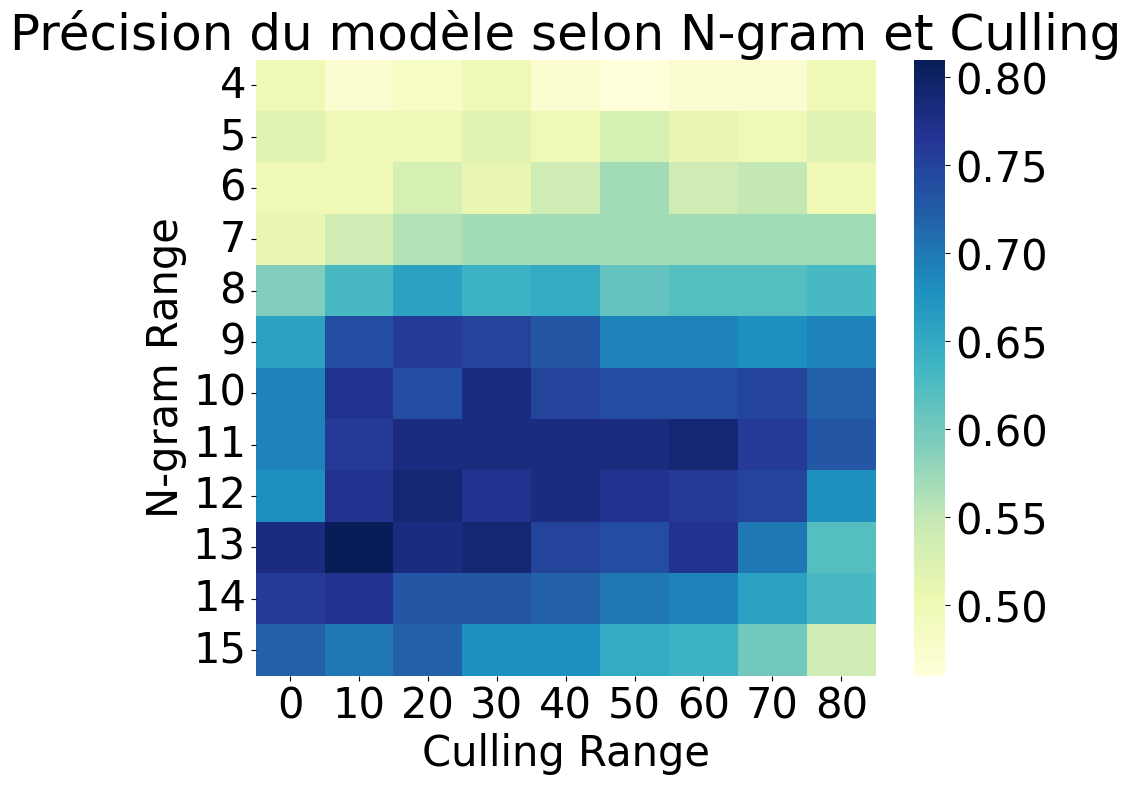

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(prec_list, annot=False, fmt=".3f", cmap="YlGnBu",
                     xticklabels=culling_range, yticklabels=gram_range)

plt.xlabel('Culling Range')
plt.ylabel('N-gram Range')
plt.title('Précision du modèle selon N-gram et Culling')

### Best option

13-gram of char with culling = 10%

.......loading texts.......
.......getting features.......
.......getting counts.......
.......Culling at 10%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:03<00:00, 33.06it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.8s finished


                    precision    recall  f1-score   support

  ChrétienDeTroyes       0.71      0.91      0.80        44
GerbertDeMontreuil       0.92      1.00      0.96        22
        JeanRenart       0.88      0.62      0.73        48

          accuracy                           0.81       114
         macro avg       0.84      0.84      0.83       114
      weighted avg       0.82      0.81      0.80       114

.......... Training final SVM with all train set ........


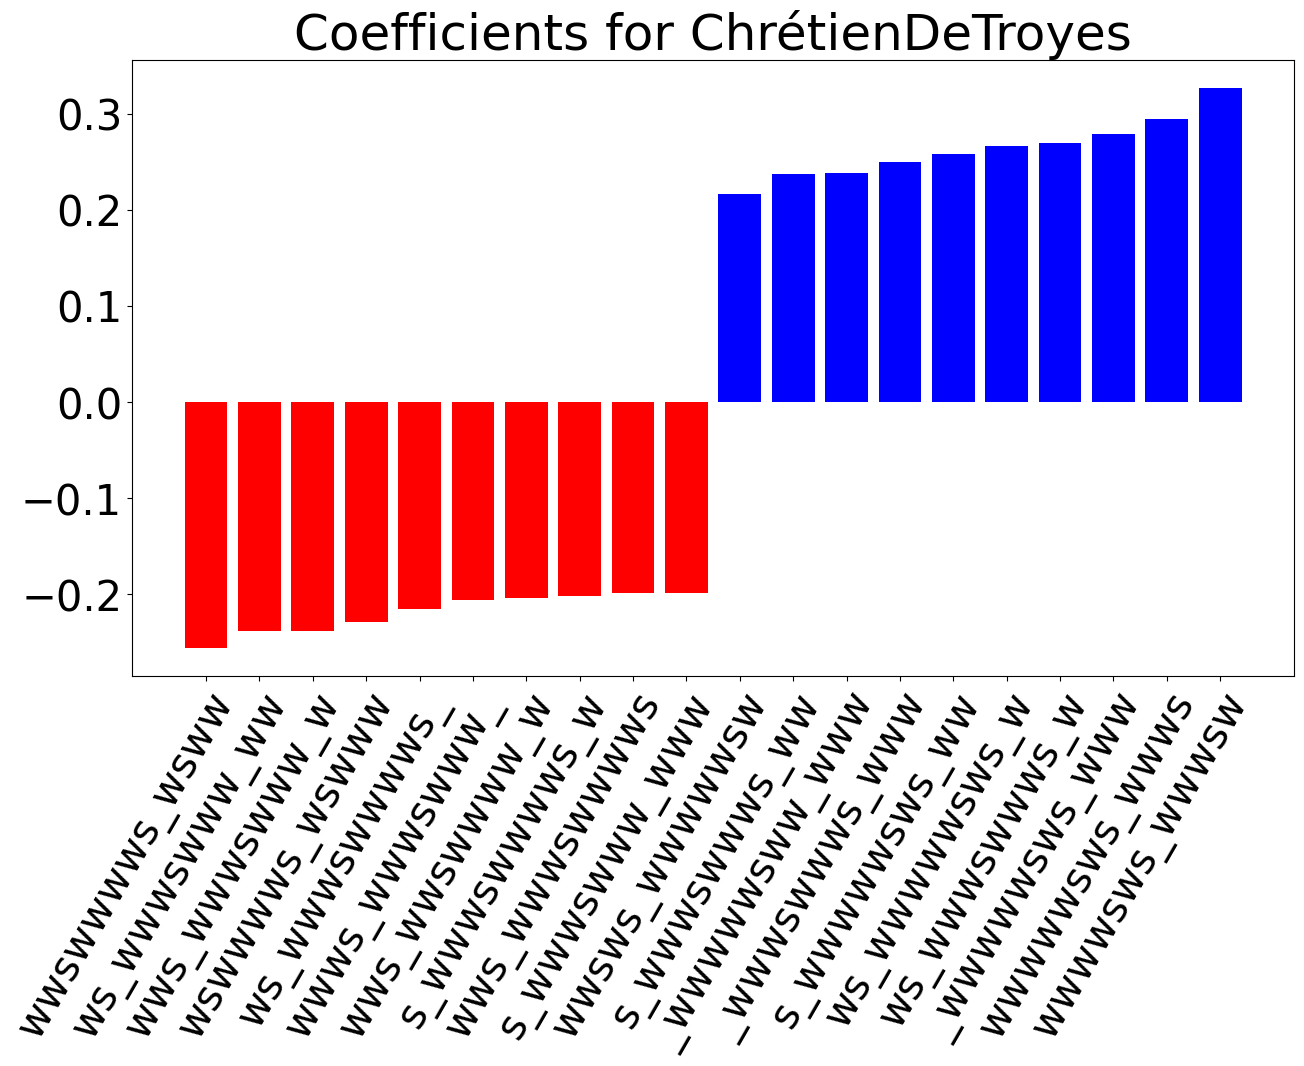

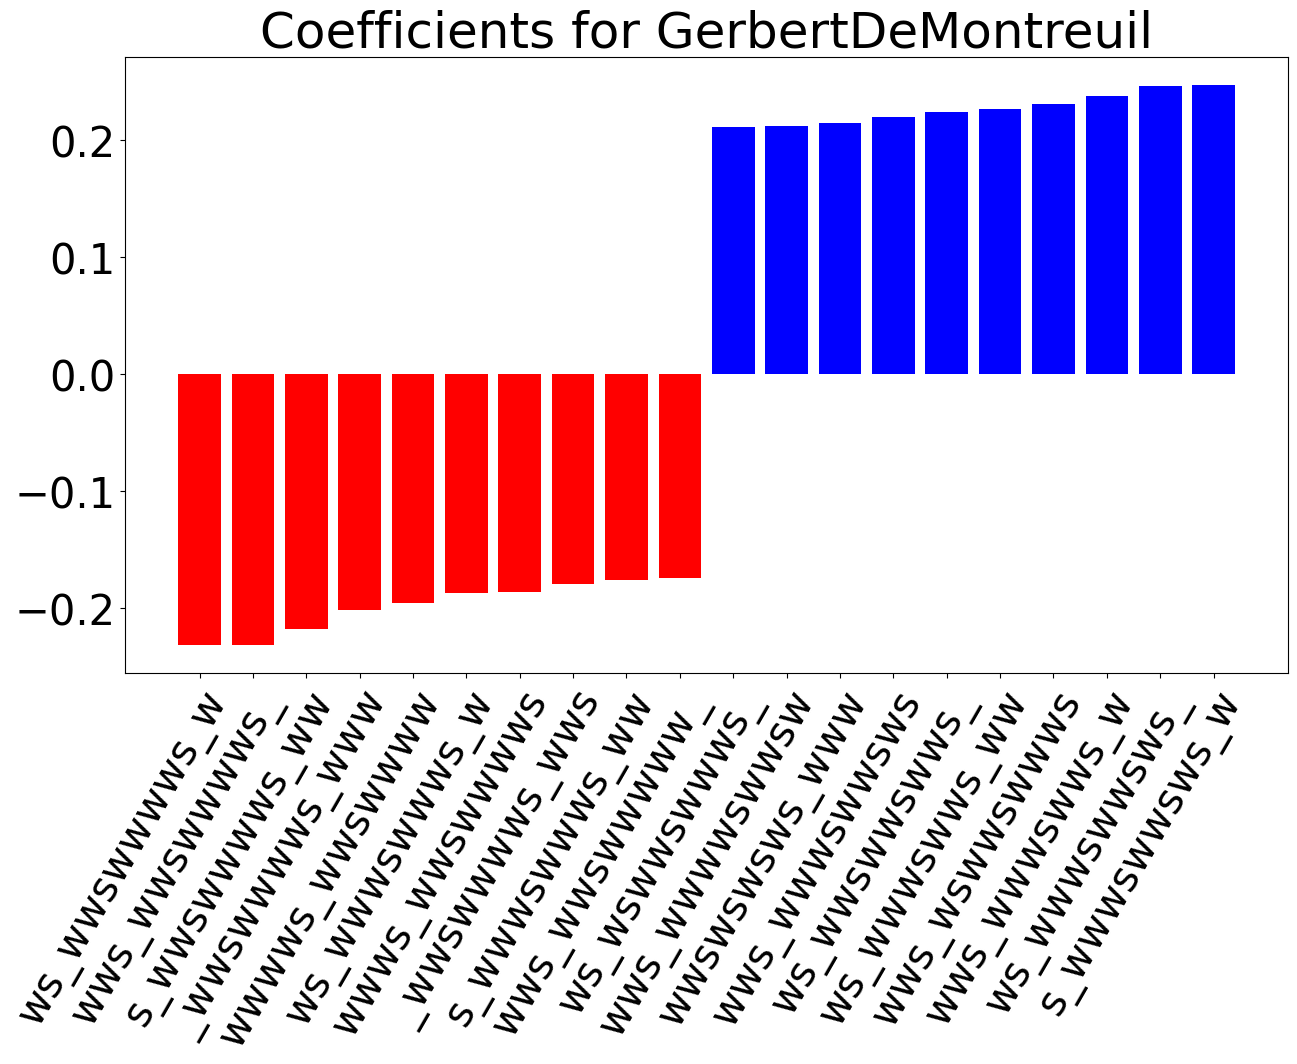

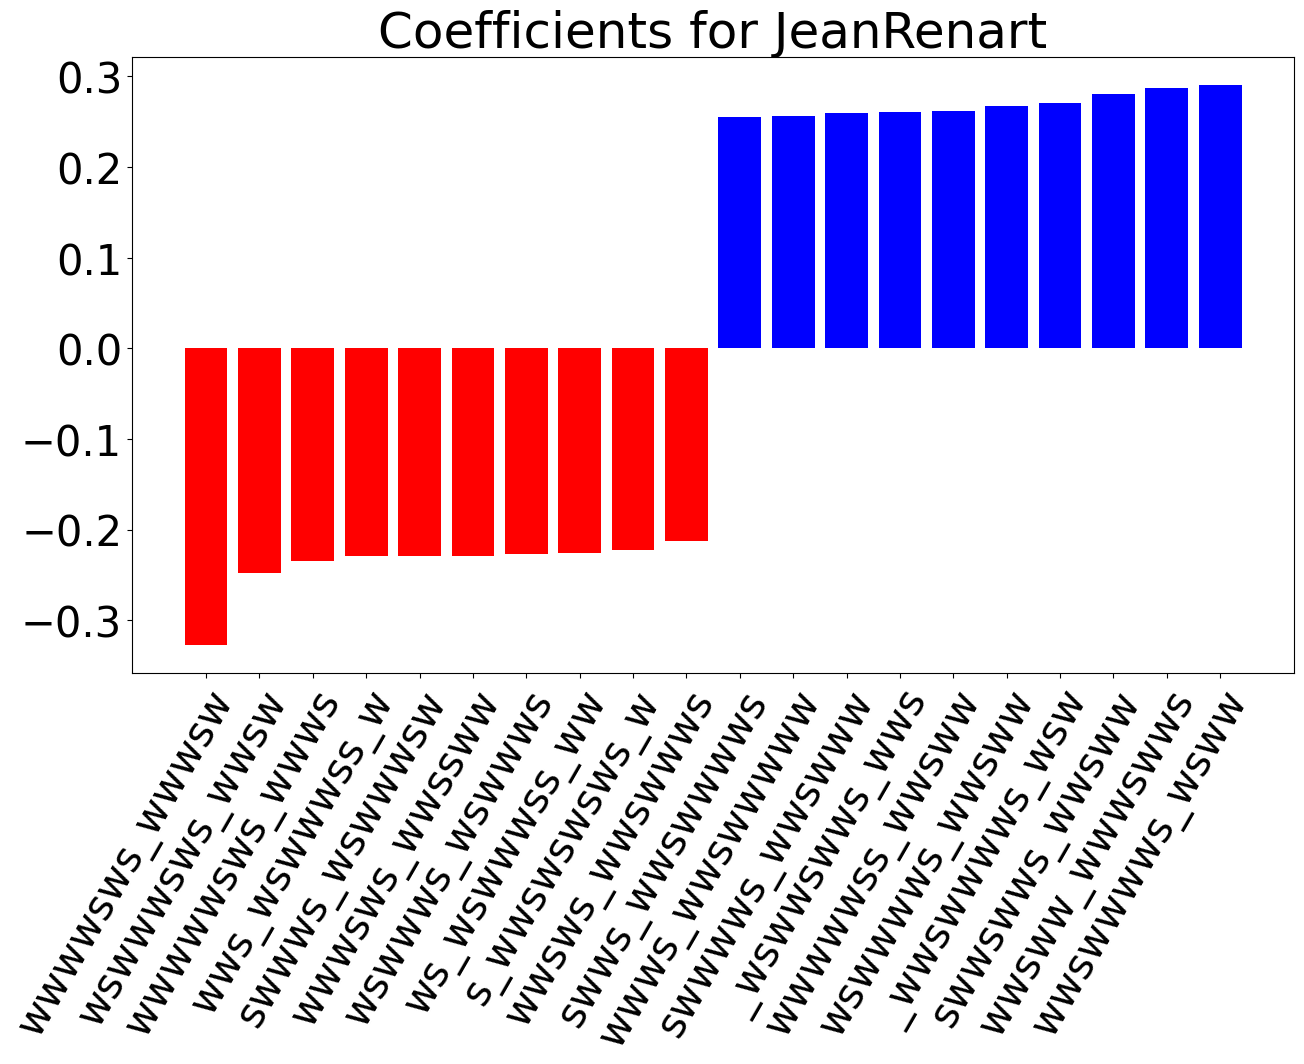

In [7]:
data_paths = glob.glob("../data/prosodie/JB/train_nowordsnoelisions/*")

chrestien_proso_train, feat_list = load_corpus(data_paths=data_paths,
                                                feats="chars", n=13, culling=10,
                                                format="txt", sampling=True, units="words", 
                                                size=300)

results = train_svm(train=chrestien_proso_train,
                    test=None,
                    cross_validate="group-k-fold",
                    balance="downsampling",
                    class_weights=True,
                    get_coefs=True
                    )


In [8]:
chrestien_proso_train

author lang  ws_wwwswwws_w  \
JeanRenart_Escoufle.txt_0-300                JeanRenart   NA       0.015225   
JeanRenart_Escoufle.txt_300-600              JeanRenart   NA       0.009959   
JeanRenart_Escoufle.txt_600-900              JeanRenart   NA       0.009956   
JeanRenart_Escoufle.txt_900-1200             JeanRenart   NA       0.012263   
JeanRenart_Escoufle.txt_1200-1500            JeanRenart   NA       0.013299   
...                                                 ...  ...            ...   
ChrétienDeTroyes_ErecKu.txt_5100-5400  ChrétienDeTroyes   NA       0.011070   
ChrétienDeTroyes_ErecKu.txt_5400-5700  ChrétienDeTroyes   NA       0.012583   
ChrétienDeTroyes_ErecKu.txt_5700-6000  ChrétienDeTroyes   NA       0.011852   
ChrétienDeTroyes_ErecKu.txt_6000-6300  ChrétienDeTroyes   NA       0.015168   
ChrétienDeTroyes_ErecKu.txt_6300-6600  ChrétienDeTroyes   NA       0.012240   

                                       s_wwwswwws_ww  wws_wwwswwws_  \
JeanRenart_Escoufle.txt_0-300               0.012254       0.010026   
JeanRenart_Escoufle.txt_300-600             0.007377       0.007746   
JeanRenart_Escoufle.txt_600-900             0.008112       0.008481   
JeanRenart_Escoufle.txt_900-1200            0.011520       0.010405   
JeanRenart_Escoufle.txt_1200-1500           0.010713       0.010713   
...                                              ...            ...   
ChrétienDeTroyes_ErecKu.txt_5100-5400       0.010701       0.008856   
ChrétienDeTroyes_ErecKu.txt_5400-5700       0.008882       0.010733   
ChrétienDeTroyes_ErecKu.txt_5700-6000       0.010370       0.011481   
ChrétienDeTroyes_ErecKu.txt_6000-6300       0.014058       0.013688   
ChrétienDeTroyes_ErecKu.txt_6300-6600       0.010015       0.009644   

                                       _wwwswwws_www  ws_wwswwwws_w  \
JeanRenart_Escoufle.txt_0-300               0.009283       0.006684   
JeanRenart_Escoufle.txt_300-600             0.007377       0.007008   
JeanRenart_Escoufle.txt_600-900             0.005162       0.007006   
JeanRenart_Escoufle.txt_900-1200            0.007432       0.008175   
JeanRenart_Escoufle.txt_1200-1500           0.008496       0.006280   
...                                              ...            ...   
ChrétienDeTroyes_ErecKu.txt_5100-5400       0.007380       0.008118   
ChrétienDeTroyes_ErecKu.txt_5400-5700       0.008142       0.008512   
ChrétienDeTroyes_ErecKu.txt_5700-6000       0.009630       0.007037   
ChrétienDeTroyes_ErecKu.txt_6000-6300       0.010729       0.008139   
ChrétienDeTroyes_ErecKu.txt_6300-6600       0.007047       0.005193   

                                       wwws_wwwswwws  wws_wwswwwws_  \
JeanRenart_Escoufle.txt_0-300               0.007798       0.005941   
JeanRenart_Escoufle.txt_300-600             0.005902       0.005902   
JeanRenart_Escoufle.txt_600-900             0.004794       0.004425   
JeanRenart_Escoufle.txt_900-1200            0.006689       0.007432   
JeanRenart_Escoufle.txt_1200-1500           0.007758       0.005541   
...                                              ...            ...   
ChrétienDeTroyes_ErecKu.txt_5100-5400       0.005904       0.006273   
ChrétienDeTroyes_ErecKu.txt_5400-5700       0.006662       0.005551   
ChrétienDeTroyes_ErecKu.txt_5700-6000       0.007407       0.004074   
ChrétienDeTroyes_ErecKu.txt_6000-6300       0.011099       0.007029   
ChrétienDeTroyes_ErecKu.txt_6300-6600       0.006677       0.004080   

                                       s_wwswwwws_ww  ...  wssww_wwwswww  \
JeanRenart_Escoufle.txt_0-300               0.005199  ...       0.000000   
JeanRenart_Escoufle.txt_300-600             0.005164  ...       0.000000   
JeanRenart_Escoufle.txt_600-900             0.004794  ...       0.000000   
JeanRenart_Escoufle.txt_900-1200            0.007061  ...       0.000000   
JeanRenart_Escoufle.txt_1200-1500           0.005172  ...       0.000000   
...                                              ...  ...            ...   
ChrétienD

In [2]:
chrestien_proso_train, feat_list = load_corpus_from_config("../config_example.json")




Loading corpus with f1...
.......loading texts.......
.......getting features.......
.......getting counts.......
.......Culling at 10%.......
.......feeding data frame.......


100%|██████████| 114/114 [00:03<00:00, 36.26it/s]


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.1s finished


              precision    recall  f1-score   support

       ChrTr       0.73      0.91      0.81        44
       GerbM       0.92      1.00      0.96        22
       JnRen       0.89      0.65      0.75        48

    accuracy                           0.82       114
   macro avg       0.84      0.85      0.84       114
weighted avg       0.83      0.82      0.81       114

.......... Training final SVM with all train set ........


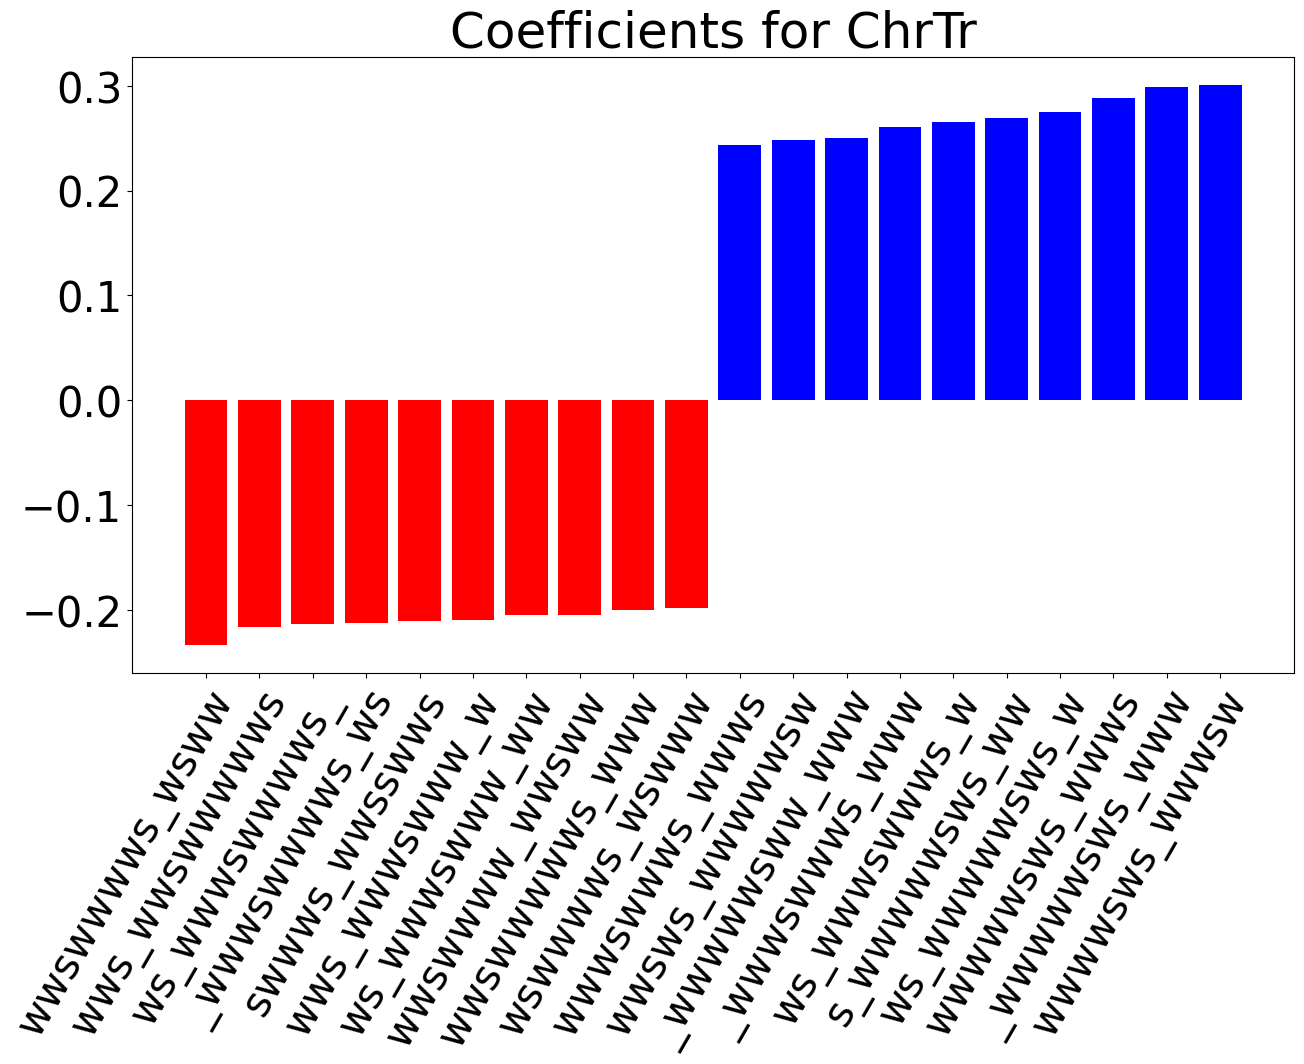

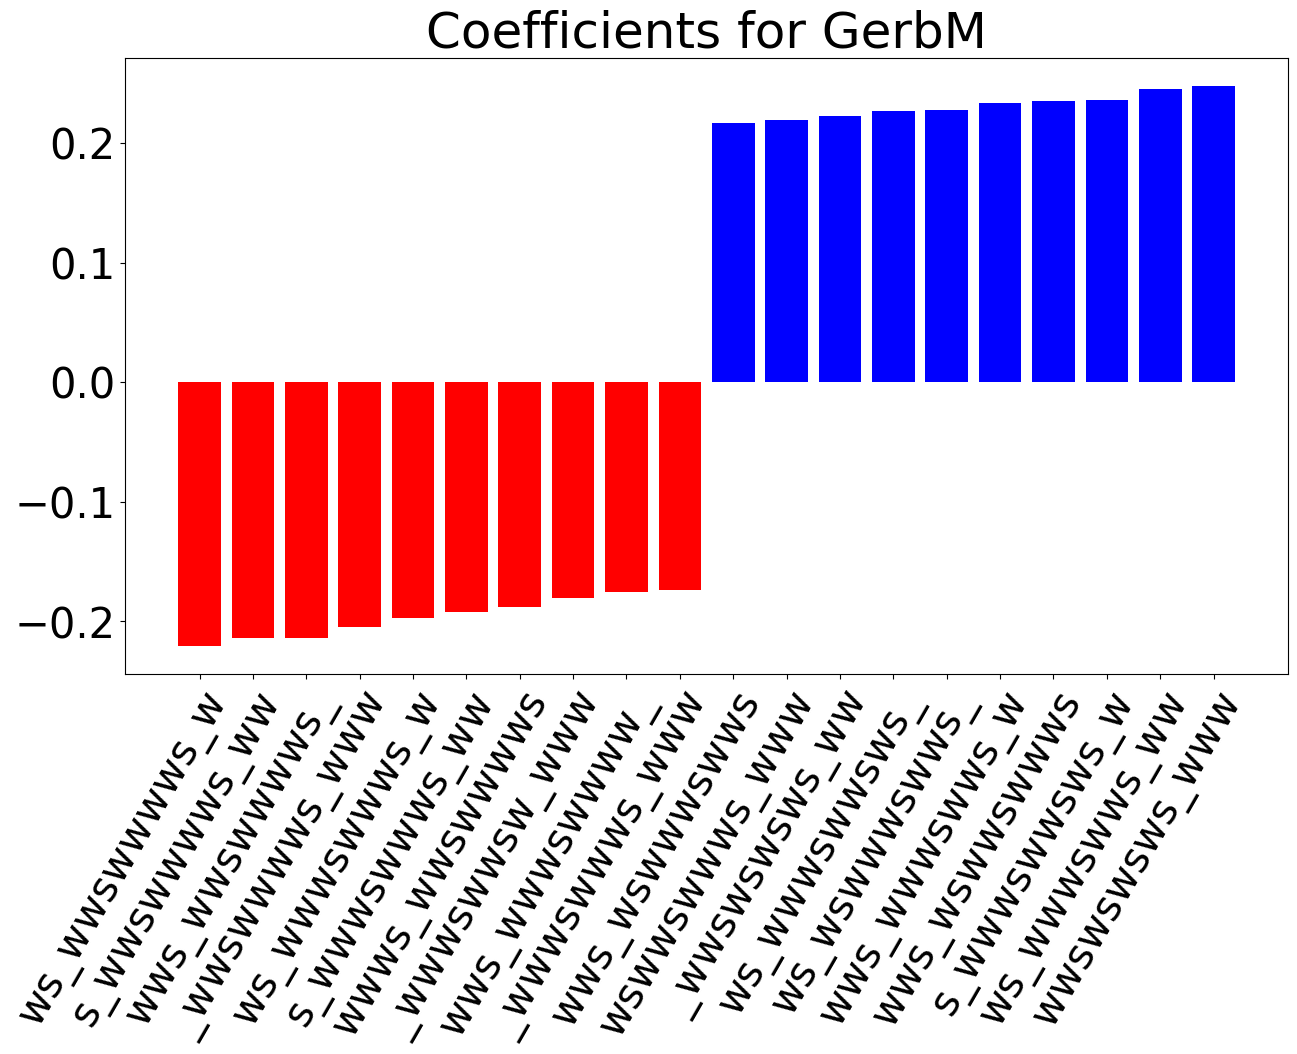

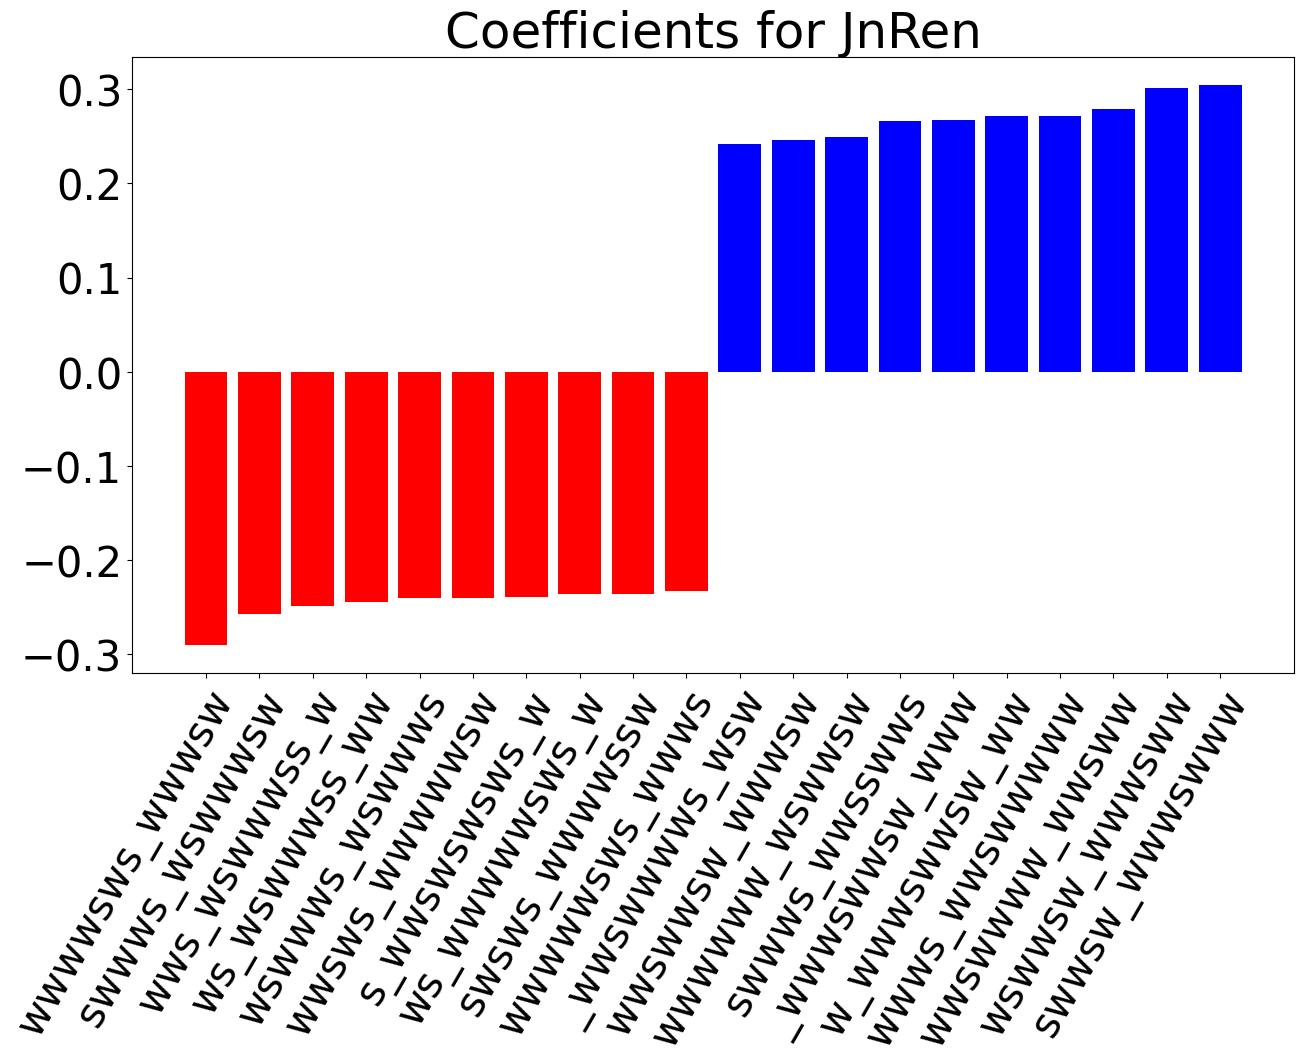

In [3]:
results = train_svm(train=chrestien_proso_train,
                    test=None,
                    cross_validate="group-k-fold",
                    balance="downsampling",
                    class_weights=True,
                    get_coefs=True
                    )

In [12]:
chrestien_proso_train, feat_list = load_corpus_from_config("../config_example2.json")


Loading corpus with f1...
.......loading texts.......
.......getting features.......
.......getting counts.......
.......feeding data frame.......


100%|██████████| 92/92 [00:00<00:00, 6987.72it/s]


.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC(class_weight='balanced'))]
.......... group-k-fold cross validation will be performed ........
.......... using 6 samples or groups........


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.1s finished


              precision    recall  f1-score   support

       ChrTr       0.76      1.00      0.86        35
       GerbM       0.72      0.72      0.72        18
       JnRen       0.89      0.64      0.75        39

    accuracy                           0.79        92
   macro avg       0.79      0.79      0.78        92
weighted avg       0.81      0.79      0.79        92

.......... Training final SVM with all train set ........


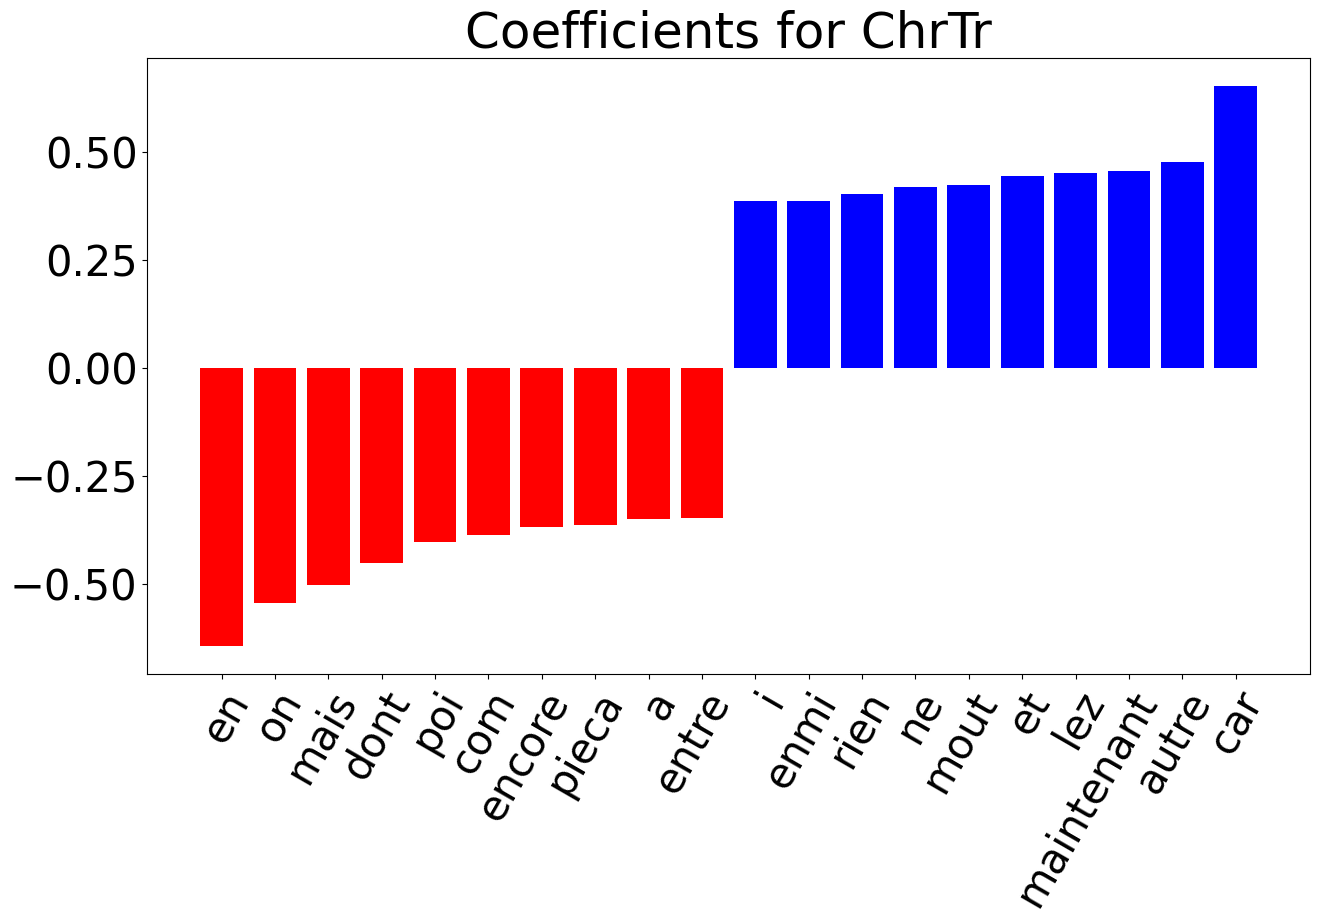

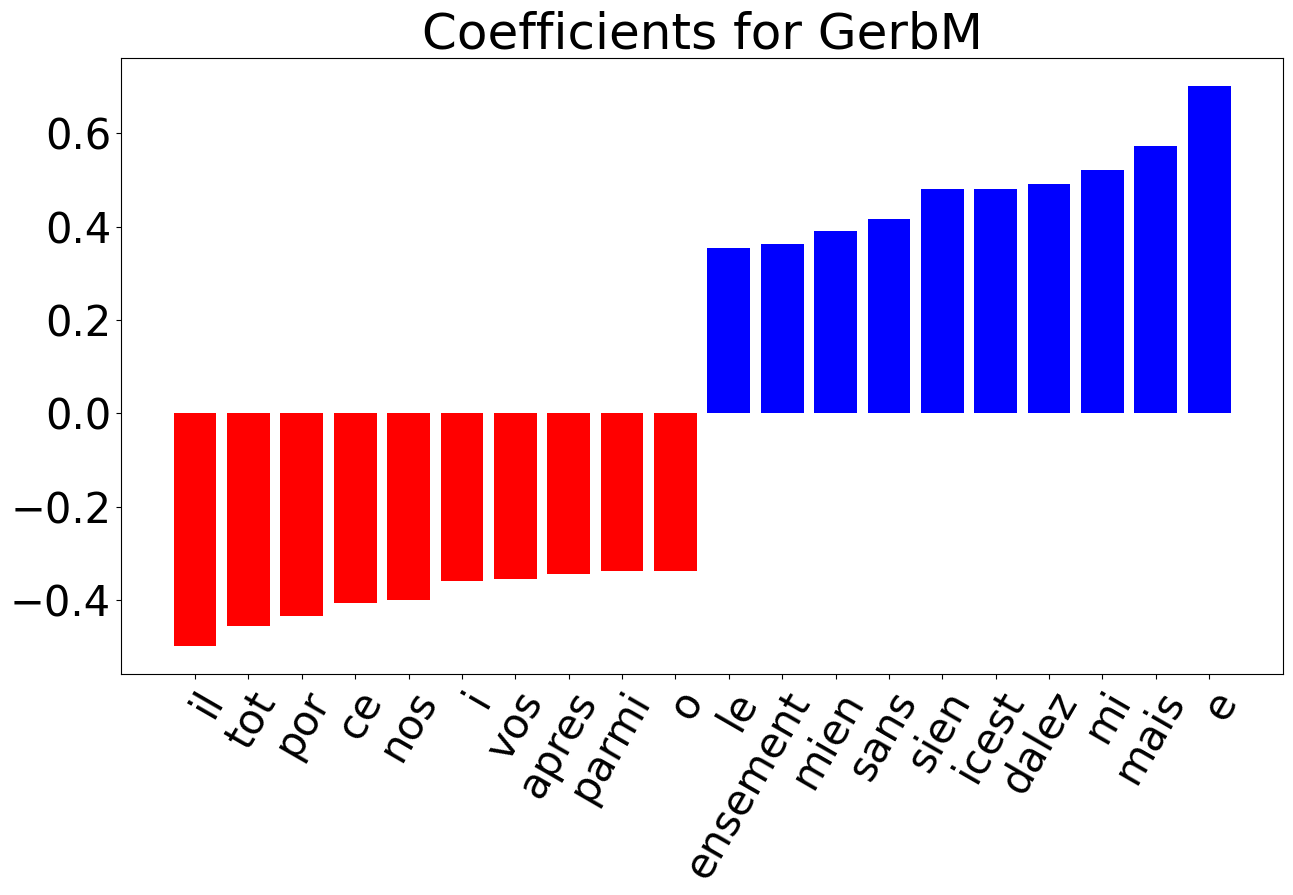

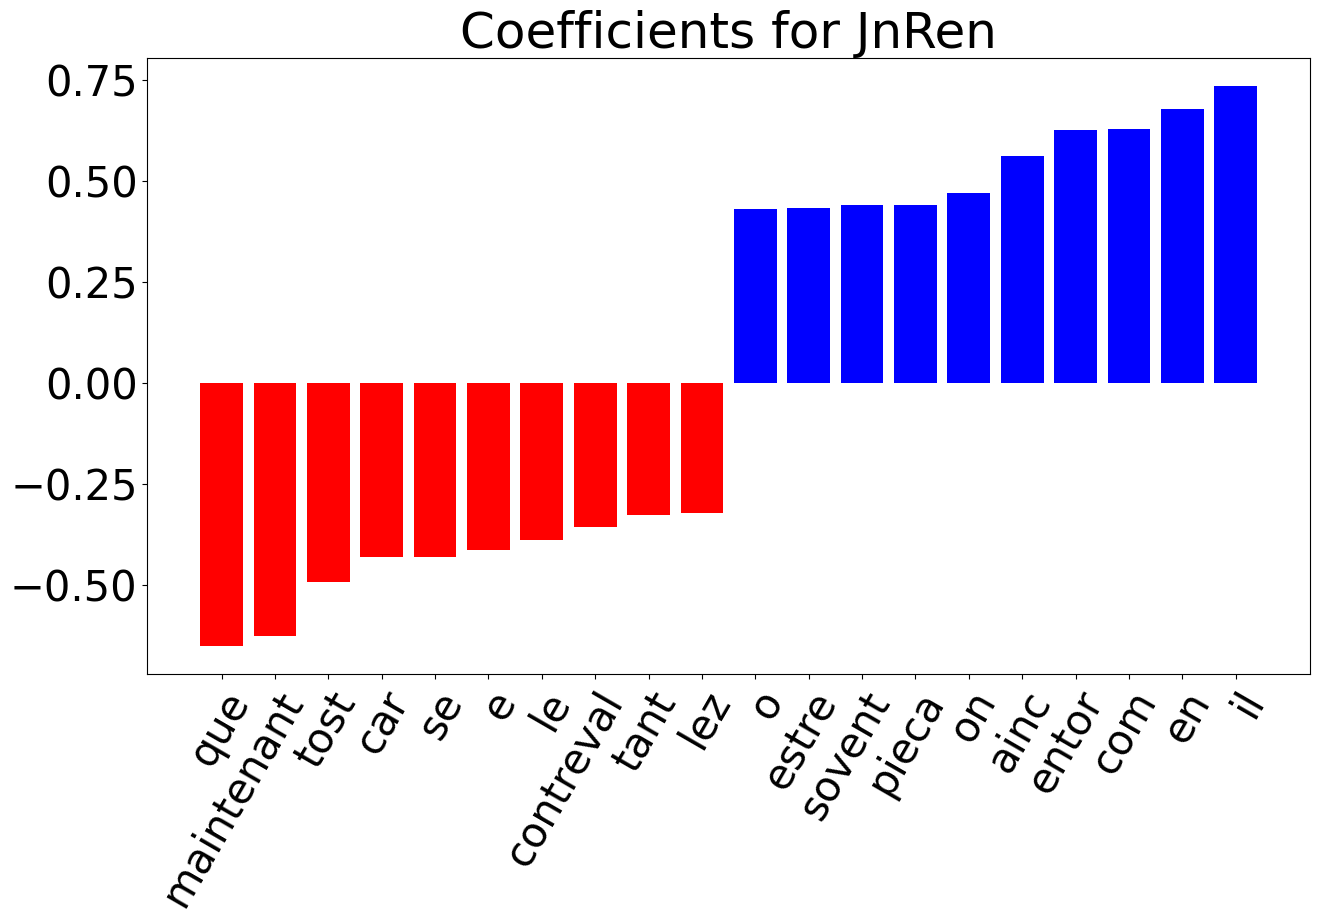

In [13]:
results = train_svm(train=chrestien_proso_train,
                    test=None,
                    cross_validate="group-k-fold",
                    balance="downsampling",
                    class_weights=True,
                    get_coefs=True
                    )